In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('2019_translated.csv')
print(df.shape)
#'ID' is the  unique attribute in the dataset , so drop duplicates by 'ID' can remove all duplicates.
df = df.drop_duplicates(subset='ID')
# look up which attribute has missing values 
print(df.isnull().sum().sort_values(ascending=False))

(41440, 51)
buildYear             2809
houseToward            963
uv                      18
pv                      18
rentType                 6
tradeMoney               1
gymNum                   1
drugStoreNum             1
hospitalNum              1
privateSchoolNum         1
schoolNum                1
interSchoolNum           1
busStationNum            1
subwayStationNum         1
saleSecHouseNum          1
region                   1
plate                    1
shopNum                  1
city                     1
communityName            1
houseDecoration          1
totalFloor               1
houseFloor               1
houseType                1
area                     1
bankNum                  1
mallNum                  1
parkNum                  1
tradeTime                1
lookNum                  1
residentPopulation       1
newWorkers               1
totalWorkers             1
landMeanPrice            1
landTotalPrice           1
tradeLandArea            1
tradeLandNum    

In [2]:
#We can easily see all attributes has 1 missing values at least except for "ID"
#So we choose "plate" which only has 1 missing values to see when "plate" has a nan value,other attribute is what
df.loc[df['plate'].isnull(),:]

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
41439,100000041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2556.0,717.0,NaN,NaN,NaN


In [3]:
'''delete the row with all nan values ,the method was given by dataset research - when attribute 'plate' is nan ,
 all attributes else except for 'ID' is nan,
 so I deleted missing values by "ID" and "plate" to drop those rows with many missing values'''
Remain = df[['ID','plate']].dropna(axis=0,how='any')
df = df.merge(Remain,on=['ID','plate'],how = 'right')
# look up which attribute has missing values 
print(df.isnull().sum().sort_values(ascending=False))


buildYear             2808
houseToward            962
uv                      18
pv                      18
rentType                 5
tradeMoney               0
gymNum                   0
drugStoreNum             0
hospitalNum              0
privateSchoolNum         0
schoolNum                0
interSchoolNum           0
busStationNum            0
subwayStationNum         0
saleSecHouseNum          0
region                   0
plate                    0
shopNum                  0
city                     0
communityName            0
houseDecoration          0
totalFloor               0
houseFloor               0
houseType                0
area                     0
bankNum                  0
mallNum                  0
parkNum                  0
tradeTime                0
lookNum                  0
residentPopulation       0
newWorkers               0
totalWorkers             0
landMeanPrice            0
landTotalPrice           0
tradeLandArea            0
tradeLandNum             0
s

In [4]:
# there are 5 missing values in "rentType" ,we can look up the value distribution in "rentType"
import collections
print(collections.Counter(list(df['rentType'])))
# Based on there are too many "Unknown" values in "rentType",so we decided to fill nan value with "Unknown" 
df['rentType'] = df['rentType'].fillna("Unknown")
# look up which attribute has missing values  
print(df.isnull().sum().sort_values(ascending=False))

Counter({'Unknown': 30758, 'Whole': 5472, 'Shared': 5204, nan: 5})
buildYear             2808
houseToward            962
uv                      18
pv                      18
tradeMoney               0
gymNum                   0
drugStoreNum             0
hospitalNum              0
privateSchoolNum         0
schoolNum                0
interSchoolNum           0
busStationNum            0
subwayStationNum         0
saleSecHouseNum          0
region                   0
plate                    0
shopNum                  0
city                     0
communityName            0
houseDecoration          0
totalFloor               0
houseFloor               0
houseType                0
rentType                 0
area                     0
bankNum                  0
mallNum                  0
parkNum                  0
tradeTime                0
lookNum                  0
residentPopulation       0
newWorkers               0
totalWorkers             0
landMeanPrice            0
landTotalPrice 

In [5]:
# there are 962 missing values in "houseToward" ,we can look up the value distribution in "houseToward"
print(collections.Counter(list(df['houseToward'])))
'''we cannot figure out how to fill the missing values by watching the distribution of a simple attribute,
so we need to look up the value distribution in "houseToward" of each 'plate' or "communityName" '''
#look up the value distribution in "houseToward" of each 'plate'
for i in df['plate'].unique():
    temp_plate = df[df['plate']==i]
    print(i,collections.Counter(list(temp_plate['houseToward'])))
#look up the value distribution in "houseToward" of each 'communityName'
for i in df['communityName'].unique():
    temp_community = df[df['communityName']==i]
    print(i,collections.Counter(list(temp_community['houseToward'])))
    

Counter({'S': 34377, 'SN': 2254, 'N': 2043, nan: 962, 'SE': 655, 'E': 552, 'W': 264, 'SW': 250, 'NW': 58, 'EW': 24})
BK00064 Counter({'S': 526, 'E': 17, 'SE': 14, 'N': 14, 'SN': 9, nan: 5, 'SW': 3, 'W': 2})
BK00049 Counter({'S': 182, nan: 15, 'SN': 14})
BK00050 Counter({'S': 841, 'SN': 38, nan: 23, 'SE': 22, 'N': 18, 'SW': 15, 'W': 14, 'E': 7, 'NW': 1})
BK00051 Counter({'S': 949, nan: 151, 'SN': 106, 'SE': 17, 'N': 12, 'E': 8, 'W': 6, 'SW': 2, 'NW': 2})
BK00044 Counter({'S': 66, 'SN': 11, 'N': 9, nan: 8, 'E': 3, 'SE': 1})
BK00052 Counter({'S': 1190, 'SN': 78, 'N': 69, nan: 13, 'SE': 11, 'E': 10, 'W': 4})
BK00031 Counter({'S': 1665, 'SN': 100, 'N': 73, nan: 68, 'E': 22, 'SE': 13, 'W': 11, 'SW': 4, 'NW': 1, 'EW': 1})
BK00028 Counter({'S': 622, 'N': 57, 'SN': 17, 'SE': 16, 'E': 14, nan: 13, 'W': 4, 'SW': 1, 'NW': 1})
BK00017 Counter({'S': 981, 'SN': 124, 'N': 124, 'E': 28, nan: 18, 'W': 11, 'SE': 10, 'SW': 4, 'NW': 4, 'EW': 1})
BK00045 Counter({'S': 1437, 'N': 127, 'SN': 119, nan: 63, 'E'

XQ03007 Counter({'S': 3, 'SE': 2, 'N': 2, nan: 1, 'SW': 1})
XQ01651 Counter({'S': 6, 'N': 5, nan: 2, 'E': 1})
XQ01339 Counter({'S': 109, 'SN': 10, nan: 9, 'N': 3, 'SE': 1})
XQ00010 Counter({'S': 2, nan: 1})
XQ02394 Counter({'S': 12, nan: 1})
XQ02351 Counter({nan: 2, 'S': 2})
XQ02311 Counter({'S': 19, nan: 1, 'SN': 1})
XQ02519 Counter({'S': 2, nan: 1})
XQ02789 Counter({'S': 126, 'SN': 16, 'SW': 3, nan: 2, 'W': 2, 'SE': 2, 'N': 1})
XQ02352 Counter({'S': 13, 'SN': 3, nan: 1})
XQ02548 Counter({'S': 2, nan: 1})
XQ01612 Counter({'S': 43, 'SN': 5, 'N': 4, nan: 2, 'E': 1})
XQ01352 Counter({nan: 2, 'SN': 1, 'S': 1})
XQ01429 Counter({'S': 3, nan: 1})
XQ01319 Counter({nan: 2, 'S': 1})
XQ02333 Counter({'S': 58, nan: 3, 'SN': 1})
XQ02510 Counter({nan: 1, 'SN': 1})
XQ02395 Counter({'S': 4, nan: 1})
XQ02366 Counter({'S': 7, 'SN': 2, nan: 1})
XQ03857 Counter({nan: 1, 'SN': 1, 'S': 1})
XQ03903 Counter({nan: 2})
XQ03090 Counter({'S': 31, 'N': 10, nan: 1})
XQ02979 Counter({'S': 11, 'SW': 2, nan: 1})
XQ01

XQ01640 Counter({nan: 1, 'S': 1, 'SE': 1})
XQ03679 Counter({'S': 2, nan: 1})
XQ02757 Counter({nan: 1, 'S': 1})
XQ01262 Counter({nan: 2, 'SN': 1})
XQ01664 Counter({'S': 4, nan: 2, 'SN': 2, 'N': 1})
XQ00275 Counter({'S': 27, nan: 1})
XQ01444 Counter({nan: 1, 'N': 1})
XQ03381 Counter({nan: 1, 'S': 1})
XQ03328 Counter({'S': 16, nan: 2, 'E': 1})
XQ02636 Counter({nan: 1, 'S': 1})
XQ02582 Counter({'S': 2, nan: 1})
XQ03439 Counter({'S': 2, nan: 1})
XQ00205 Counter({'S': 39, nan: 5, 'SN': 4, 'SE': 1})
XQ00238 Counter({nan: 1, 'S': 1})
XQ01446 Counter({'S': 2, nan: 1})
XQ03364 Counter({'S': 44, 'SN': 7, nan: 2})
XQ03414 Counter({'S': 66, nan: 2, 'E': 1})
XQ02931 Counter({nan: 1, 'S': 1})
XQ04102 Counter({nan: 1, 'SW': 1})
XQ01465 Counter({'S': 12, nan: 2, 'W': 2, 'SN': 1, 'SE': 1, 'E': 1})
XQ03385 Counter({'S': 17, 'N': 3, nan: 1, 'SN': 1})
XQ03410 Counter({'S': 3, nan: 1})
XQ03325 Counter({nan: 2})
XQ04027 Counter({nan: 1})
XQ01642 Counter({'S': 53, 'E': 16, 'N': 13, 'SN': 8, 'W': 4, nan: 3, 'S

XQ00657 Counter({nan: 1, 'S': 1})
XQ01102 Counter({'S': 2, nan: 1})
XQ00688 Counter({'S': 2, nan: 1, 'N': 1})
XQ01231 Counter({'S': 20, nan: 1, 'SE': 1})
XQ00843 Counter({nan: 1, 'S': 1})
XQ02290 Counter({'S': 61, 'SN': 7, nan: 4, 'N': 2})
XQ01174 Counter({'S': 3, nan: 1})
XQ00630 Counter({'S': 14, nan: 1, 'W': 1, 'SN': 1})
XQ01243 Counter({'S': 2, nan: 1})
XQ02272 Counter({'S': 6, nan: 1})
XQ01137 Counter({'S': 3, nan: 1})
XQ01015 Counter({nan: 1})
XQ00997 Counter({'S': 6, nan: 3, 'SN': 1, 'N': 1})
XQ01157 Counter({nan: 1})
XQ00631 Counter({'S': 2, nan: 1})
XQ01207 Counter({'S': 78, 'SN': 17, 'SE': 6, 'SW': 3, 'W': 2, nan: 1, 'E': 1, 'N': 1})
XQ01241 Counter({'S': 6, 'SN': 2, nan: 1, 'SE': 1})
XQ02300 Counter({'S': 27, 'SN': 5, nan: 2, 'N': 2})
XQ00486 Counter({nan: 1, 'S': 1, 'N': 1})
XQ00880 Counter({'S': 8, nan: 3, 'SE': 3, 'N': 2, 'SW': 1, 'NW': 1, 'E': 1})
XQ00987 Counter({'S': 2, nan: 1})
XQ00622 Counter({'S': 12, nan: 1})
XQ00606 Counter({nan: 1, 'SN': 1, 'S': 1})
XQ01200 Count

XQ01715 Counter({'S': 12, 'N': 3, 'W': 1, 'SN': 1})
XQ02821 Counter({'W': 1})
XQ02990 Counter({'S': 2, 'W': 1})
XQ01404 Counter({'S': 19, 'W': 1})
XQ03764 Counter({'S': 9, 'W': 1, 'E': 1})
XQ01608 Counter({'S': 15, 'SN': 4, 'W': 1, 'N': 1})
XQ03864 Counter({'S': 3, 'N': 2, 'W': 1, 'SN': 1, 'SE': 1, 'E': 1})
XQ03075 Counter({'S': 24, 'N': 2, 'W': 1, 'SN': 1})
XQ01712 Counter({'W': 1, 'S': 1})
XQ00184 Counter({'S': 11, 'W': 1, 'SE': 1, 'E': 1, 'N': 1})
XQ02986 Counter({'N': 2, 'W': 1})
XQ00050 Counter({'S': 43, 'E': 2, 'W': 1, 'SE': 1, 'N': 1})
XQ00150 Counter({'S': 9, 'W': 3})
XQ03447 Counter({'S': 22, 'N': 7, 'W': 2, 'SE': 2, 'E': 2})
XQ03697 Counter({'S': 10, 'W': 1})
XQ00147 Counter({'S': 5, 'N': 3, 'W': 1, 'E': 1})
XQ03753 Counter({'S': 21, 'SE': 3, 'N': 3, 'W': 1})
XQ00005 Counter({'S': 11, 'W': 1, 'N': 1})
XQ00530 Counter({'S': 130, 'N': 16, 'E': 4, 'W': 1})
XQ00515 Counter({'S': 7, 'E': 4, 'W': 2, 'N': 1})
XQ00186 Counter({'S': 35, 'SN': 5, 'W': 1, 'N': 1})
XQ02684 Counter({'S': 

XQ01602 Counter({'S': 19, 'SN': 4, 'SE': 1})
XQ01425 Counter({'S': 25, 'SN': 1, 'SE': 1})
XQ01419 Counter({'S': 45, 'N': 4, 'SN': 3, 'E': 1})
XQ03030 Counter({'S': 2, 'SN': 1})
XQ01556 Counter({'SN': 2, 'S': 1})
XQ01607 Counter({'S': 13, 'SN': 9})
XQ01370 Counter({'S': 11, 'SN': 1, 'SE': 1})
XQ03886 Counter({'SN': 1, 'S': 1})
XQ02344 Counter({'SN': 3, 'S': 1})
XQ00610 Counter({'SN': 1, 'S': 1})
XQ01571 Counter({'S': 7, 'SN': 5, 'N': 1})
XQ01287 Counter({'S': 12, 'SN': 1})
XQ02304 Counter({'S': 3, 'SN': 1})
XQ02398 Counter({'SN': 1})
XQ02830 Counter({'S': 54, 'N': 4, 'SN': 3})
XQ02440 Counter({'S': 21, 'SN': 1, 'SE': 1})
XQ02401 Counter({'S': 2, 'SN': 1})
XQ02420 Counter({'S': 2, 'SN': 1})
XQ03858 Counter({'S': 17, 'SN': 2})
XQ03049 Counter({'SN': 1})
XQ02959 Counter({'S': 2, 'SN': 1, 'E': 1})
XQ03012 Counter({'SN': 1, 'S': 1})
XQ01350 Counter({'S': 30, 'N': 5, 'SN': 2, 'SE': 1})
XQ01625 Counter({'S': 3, 'N': 3, 'SN': 1})
XQ01437 Counter({'SN': 1, 'S': 1})
XQ01302 Counter({'SN': 1})
XQ0

XQ01252 Counter({'S': 11, 'SN': 2})
XQ03817 Counter({'SN': 1, 'S': 1})
XQ02496 Counter({'SN': 1})
XQ03092 Counter({'S': 36, 'SN': 5, 'N': 5})
XQ03179 Counter({'SN': 1})
XQ01902 Counter({'S': 17, 'SN': 3, 'N': 2})
XQ03080 Counter({'S': 30, 'SN': 9, 'N': 4})
XQ01886 Counter({'S': 22, 'SN': 3})
XQ02006 Counter({'S': 41, 'SN': 5, 'N': 2})
XQ00249 Counter({'S': 6, 'SN': 2})
XQ03084 Counter({'SN': 1})
XQ03102 Counter({'S': 22, 'SN': 4})
XQ01847 Counter({'S': 18, 'SN': 1})
XQ01913 Counter({'S': 9, 'SN': 4})
XQ02101 Counter({'SN': 1, 'S': 1})
XQ02122 Counter({'S': 3, 'SN': 1})
XQ02590 Counter({'S': 21, 'N': 3, 'SN': 1})
XQ03965 Counter({'S': 2, 'SN': 1, 'E': 1})
XQ01819 Counter({'S': 11, 'SN': 2, 'SE': 1, 'E': 1})
XQ03159 Counter({'S': 43, 'SN': 2})
XQ02034 Counter({'SN': 2})
XQ03108 Counter({'S': 2, 'SN': 1})
XQ02027 Counter({'S': 20, 'SN': 2})
XQ03285 Counter({'S': 25, 'N': 4, 'SN': 1, 'SE': 1})
XQ00310 Counter({'S': 7, 'SN': 2, 'SE': 1})
XQ02206 Counter({'S': 26, 'SN': 6})
XQ00281 Counter({

XQ01190 Counter({'S': 3})
XQ01485 Counter({'S': 1})
XQ02813 Counter({'S': 6})
XQ02613 Counter({'S': 21, 'N': 2, 'E': 1})
XQ01461 Counter({'S': 5})
XQ02779 Counter({'S': 13, 'SE': 1})
XQ01443 Counter({'S': 14, 'E': 1})
XQ02581 Counter({'S': 6, 'N': 1})
XQ01763 Counter({'S': 45, 'N': 11})
XQ02854 Counter({'S': 1})
XQ03239 Counter({'S': 28, 'N': 3})
XQ01779 Counter({'S': 2})
XQ01811 Counter({'S': 26})
XQ01775 Counter({'S': 14, 'E': 1})
XQ02237 Counter({'S': 3})
XQ01203 Counter({'S': 11})
XQ02448 Counter({'S': 13})
XQ02382 Counter({'S': 3})
XQ02107 Counter({'S': 1})
XQ00828 Counter({'S': 3})
XQ02345 Counter({'S': 4})
XQ02415 Counter({'S': 1})
XQ02254 Counter({'S': 10, 'N': 1})
XQ02392 Counter({'S': 5})
XQ02425 Counter({'S': 6})
XQ02350 Counter({'S': 6})
XQ00552 Counter({'S': 26})
XQ02221 Counter({'S': 1})
XQ00148 Counter({'S': 7})
XQ00414 Counter({'S': 14, 'N': 2})
XQ02442 Counter({'S': 10})
XQ00446 Counter({'S': 1})
XQ02369 Counter({'S': 5})
XQ00885 Counter({'S': 13, 'SE': 1, 'N': 1})
XQ0

XQ02067 Counter({'S': 17})
XQ01860 Counter({'S': 1})
XQ01800 Counter({'S': 9})
XQ02088 Counter({'S': 18, 'N': 1})
XQ02081 Counter({'S': 2})
XQ01984 Counter({'S': 17})
XQ02069 Counter({'S': 17})
XQ01801 Counter({'S': 13})
XQ01973 Counter({'S': 17, 'N': 1})
XQ01927 Counter({'S': 38})
XQ01953 Counter({'S': 29, 'E': 1})
XQ01941 Counter({'S': 22, 'N': 1})
XQ01831 Counter({'S': 23})
XQ01987 Counter({'S': 5})
XQ02245 Counter({'S': 30})
XQ01975 Counter({'S': 13, 'N': 2})
XQ01986 Counter({'S': 25, 'E': 1})
XQ01947 Counter({'S': 9})
XQ02262 Counter({'S': 3})
XQ02131 Counter({'S': 14})
XQ02233 Counter({'S': 23, 'N': 4})
XQ02249 Counter({'S': 18})
XQ02149 Counter({'S': 1})
XQ02255 Counter({'S': 5})
XQ02113 Counter({'S': 1})
XQ02240 Counter({'S': 2})
XQ02248 Counter({'S': 35})
XQ02106 Counter({'S': 1})
XQ02257 Counter({'S': 30, 'N': 3, 'SE': 1, 'E': 1})
XQ02109 Counter({'S': 1})
XQ02285 Counter({'S': 3})
XQ02283 Counter({'S': 9})
XQ02294 Counter({'S': 3})
XQ02140 Counter({'S': 11})
XQ02218 Counter(

XQ02002 Counter({'S': 1})
XQ01855 Counter({'S': 10})
XQ01932 Counter({'S': 2})
XQ00322 Counter({'S': 5})
XQ00410 Counter({'S': 33, 'N': 2})
XQ00966 Counter({'S': 1, 'N': 1})
XQ01030 Counter({'S': 8})
XQ00517 Counter({'S': 5})
XQ00647 Counter({'S': 4})
XQ00718 Counter({'S': 3})
XQ00950 Counter({'S': 15})
XQ01083 Counter({'S': 6, 'SE': 1})
XQ01031 Counter({'S': 13})
XQ03260 Counter({'S': 2})
XQ02265 Counter({'S': 1})
XQ02260 Counter({'S': 15, 'SE': 1})
XQ02152 Counter({'S': 1})
XQ01067 Counter({'S': 3})
XQ01223 Counter({'S': 15})
XQ00536 Counter({'S': 1, 'N': 1})
XQ01225 Counter({'S': 35, 'N': 1})
XQ01006 Counter({'S': 9, 'SE': 2, 'N': 1})
XQ02222 Counter({'S': 2})
XQ00021 Counter({'S': 13, 'E': 1})
XQ00601 Counter({'S': 7})
XQ00932 Counter({'S': 14, 'N': 1})
XQ00283 Counter({'S': 3})
XQ00700 Counter({'S': 4})
XQ00668 Counter({'S': 41, 'N': 7})
XQ03321 Counter({'S': 1})
XQ00772 Counter({'S': 11})
XQ02808 Counter({'S': 1})
XQ03616 Counter({'S': 2})
XQ03782 Counter({'S': 1})
XQ02790 Counte

XQ01383 Counter({'S': 1})
XQ01377 Counter({'S': 4})
XQ01327 Counter({'S': 14})
XQ01394 Counter({'S': 1})
XQ01333 Counter({'S': 2})
XQ03977 Counter({'S': 14, 'N': 2, 'E': 1})
XQ03451 Counter({'S': 3, 'N': 1})
XQ02327 Counter({'S': 1, 'E': 1})
XQ02826 Counter({'S': 1})
XQ02911 Counter({'S': 9, 'SE': 4})
XQ02596 Counter({'S': 6, 'N': 3})
XQ02546 Counter({'S': 7, 'E': 1})
XQ02526 Counter({'S': 1})
XQ02552 Counter({'S': 1})
XQ02805 Counter({'S': 1})
XQ03055 Counter({'S': 4, 'N': 1})
XQ02964 Counter({'S': 3})
XQ01595 Counter({'S': 2, 'SE': 1})
XQ01678 Counter({'S': 7})
XQ01488 Counter({'S': 13, 'N': 4})
XQ01396 Counter({'S': 3, 'N': 1})
XQ01298 Counter({'S': 1})
XQ01317 Counter({'S': 2})
XQ03993 Counter({'S': 12})
XQ03558 Counter({'S': 10})
XQ03683 Counter({'S': 1, 'N': 1})
XQ03930 Counter({'S': 17, 'SE': 1})
XQ03916 Counter({'S': 1})
XQ03800 Counter({'S': 7})
XQ03763 Counter({'S': 2, 'E': 1})
XQ03898 Counter({'S': 10, 'SE': 1, 'N': 1})
XQ04149 Counter({'S': 2})
XQ04134 Counter({'S': 18, 'N'

XQ03895 Counter({'S': 6, 'N': 4})
XQ03712 Counter({'S': 7})
XQ04145 Counter({'S': 7, 'N': 1})
XQ01792 Counter({'S': 23, 'N': 1})
XQ04000 Counter({'S': 7, 'N': 1})
XQ03940 Counter({'S': 2})
XQ00054 Counter({'S': 5})
XQ00007 Counter({'S': 2})
XQ03083 Counter({'S': 5})
XQ03147 Counter({'S': 2})
XQ03504 Counter({'S': 2})
XQ03741 Counter({'S': 1, 'SE': 1, 'N': 1})
XQ03875 Counter({'S': 1})
XQ04123 Counter({'S': 2, 'N': 2})
XQ00032 Counter({'S': 1})
XQ03134 Counter({'S': 10, 'N': 1})
XQ01876 Counter({'S': 5})
XQ00497 Counter({'S': 4, 'N': 1})
XQ00159 Counter({'S': 2, 'N': 1})
XQ00502 Counter({'S': 3})
XQ00168 Counter({'S': 10})
XQ03549 Counter({'S': 1})
XQ03561 Counter({'S': 2})
XQ03902 Counter({'S': 2})
XQ03910 Counter({'S': 1})
XQ04112 Counter({'S': 2})
XQ03647 Counter({'S': 5, 'N': 1})
XQ03750 Counter({'S': 6})
XQ03510 Counter({'S': 7})
XQ04171 Counter({'S': 7})
XQ04183 Counter({'S': 1})
XQ04222 Counter({'S': 6, 'N': 4})
XQ03575 Counter({'S': 1})
XQ04219 Counter({'S': 2})
XQ03620 Counter(

XQ02618 Counter({'S': 1, 'N': 1})
XQ00055 Counter({'S': 2, 'SE': 1})
XQ03210 Counter({'S': 2})
XQ03200 Counter({'S': 2})
XQ00853 Counter({'S': 19, 'N': 6})
XQ00617 Counter({'S': 8, 'N': 4})
XQ00158 Counter({'S': 5, 'SE': 2})
XQ03718 Counter({'S': 1})
XQ04190 Counter({'S': 1})
XQ03704 Counter({'S': 1})
XQ03737 Counter({'S': 2})
XQ02896 Counter({'S': 6})
XQ03544 Counter({'S': 1})
XQ04007 Counter({'SE': 2, 'S': 1})
XQ04043 Counter({'S': 2, 'E': 1})
XQ03583 Counter({'S': 1})
XQ03025 Counter({'S': 1})
XQ02463 Counter({'S': 1})
XQ03989 Counter({'S': 13})
XQ02609 Counter({'S': 2})
XQ02658 Counter({'S': 6})
XQ03393 Counter({'S': 6})
XQ02651 Counter({'S': 3})
XQ03347 Counter({'S': 2})
XQ02787 Counter({'S': 3})
XQ02799 Counter({'S': 2})
XQ02616 Counter({'S': 2})
XQ03401 Counter({'S': 3})
XQ02659 Counter({'S': 2})
XQ02920 Counter({'S': 3})
XQ02727 Counter({'S': 5, 'SE': 1, 'N': 1})
XQ02958 Counter({'S': 1})
XQ02730 Counter({'S': 1})
XQ03829 Counter({'S': 1})
XQ03801 Counter({'S': 2})
XQ03988 Coun

XQ03177 Counter({'S': 4})
XQ03311 Counter({'S': 15, 'N': 2, 'SE': 1})
XQ02018 Counter({'S': 1})
XQ01816 Counter({'S': 1})
XQ02078 Counter({'S': 2})
XQ01774 Counter({'S': 8})
XQ02039 Counter({'S': 2})
XQ03230 Counter({'S': 3})
XQ02030 Counter({'S': 2, 'N': 1})
XQ03223 Counter({'S': 10, 'E': 1})
XQ00339 Counter({'S': 3})
XQ01119 Counter({'S': 1, 'N': 1})
XQ01068 Counter({'S': 3})
XQ01977 Counter({'S': 10})
XQ01982 Counter({'S': 13, 'SE': 1})
XQ01945 Counter({'S': 10, 'E': 1})
XQ01983 Counter({'S': 3})
XQ02159 Counter({'S': 1})
XQ02183 Counter({'S': 12, 'N': 3, 'E': 1})
XQ02199 Counter({'S': 11, 'N': 1})
XQ02196 Counter({'S': 1})
XQ03056 Counter({'S': 1})
XQ02476 Counter({'S': 3})
XQ02683 Counter({'S': 1})
XQ02660 Counter({'S': 3})
XQ02508 Counter({'S': 1})
XQ02688 Counter({'S': 1})
XQ01494 Counter({'S': 4, 'N': 1})
XQ03339 Counter({'S': 1})
XQ02801 Counter({'S': 1})
XQ01676 Counter({'S': 2})
XQ02362 Counter({'S': 1})
XQ03468 Counter({'S': 2, 'N': 1})
XQ04038 Counter({'S': 3})
XQ04048 Cou

XQ03991 Counter({'S': 1})
XQ02652 Counter({'S': 1})
XQ02629 Counter({'S': 1})
XQ03345 Counter({'S': 1})
XQ03365 Counter({'S': 1})
XQ02643 Counter({'S': 1})
XQ02924 Counter({'S': 1})
XQ02639 Counter({'S': 2})
XQ01521 Counter({'S': 2})
XQ03773 Counter({'S': 2})
XQ02721 Counter({'S': 2, 'SE': 1, 'E': 1})
XQ02725 Counter({'SE': 4, 'S': 2, 'E': 1, 'N': 1})
XQ02740 Counter({'S': 1})
XQ03686 Counter({'S': 1, 'E': 1})
XQ03204 Counter({'S': 3})
XQ00180 Counter({'S': 2})
XQ02891 Counter({'S': 2})
XQ02847 Counter({'S': 1})
XQ02485 Counter({'S': 2})
XQ02689 Counter({'S': 1})
XQ02480 Counter({'S': 2})
XQ03346 Counter({'S': 2})
XQ02627 Counter({'S': 1})
XQ03340 Counter({'S': 2})
XQ03031 Counter({'S': 1})
XQ04128 Counter({'S': 2, 'E': 1})
XQ02792 Counter({'S': 1, 'SE': 1})
XQ04051 Counter({'S': 2})
XQ02672 Counter({'S': 1})
XQ02732 Counter({'S': 1})
XQ03813 Counter({'S': 1})
XQ03772 Counter({'S': 1})
XQ01519 Counter({'S': 1})
XQ03840 Counter({'S': 1})
XQ03999 Counter({'S': 1})
XQ03098 Counter({'S': 1

XQ01872 Counter({'S': 1})
XQ03315 Counter({'SE': 2, 'S': 1})
XQ02259 Counter({'S': 1})
XQ01914 Counter({'S': 1})
XQ02114 Counter({'S': 1})
XQ02135 Counter({'S': 1})
XQ02227 Counter({'S': 1})
XQ02275 Counter({'S': 9})
XQ00347 Counter({'S': 10, 'N': 1})
XQ00357 Counter({'S': 8})
XQ00479 Counter({'S': 1})
XQ00433 Counter({'S': 11, 'N': 1})
XQ00426 Counter({'S': 6})
XQ00448 Counter({'S': 1})
XQ01126 Counter({'S': 5})
XQ01105 Counter({'S': 16, 'N': 1})
XQ00995 Counter({'S': 12, 'E': 1})
XQ01008 Counter({'S': 5})
XQ00988 Counter({'S': 4})
XQ00919 Counter({'S': 15, 'N': 1})
XQ01034 Counter({'S': 2})
XQ00978 Counter({'S': 13, 'N': 3})
XQ00990 Counter({'S': 1})
XQ00968 Counter({'S': 14})
XQ01001 Counter({'S': 3})
XQ00967 Counter({'S': 1})
XQ00904 Counter({'S': 16})
XQ00989 Counter({'S': 3})
XQ00960 Counter({'S': 2})
XQ01007 Counter({'S': 4, 'E': 1})
XQ00947 Counter({'S': 2})
XQ01159 Counter({'S': 14})
XQ01151 Counter({'S': 6})
XQ01178 Counter({'S': 2})
XQ00723 Counter({'S': 4, 'N': 1})
XQ00660 

XQ00683 Counter({'S': 4, 'N': 1})
XQ01245 Counter({'S': 5, 'SE': 1})
XQ04136 Counter({'S': 2})
XQ04116 Counter({'S': 1})
XQ00827 Counter({'S': 3})
XQ00761 Counter({'S': 5})
XQ00809 Counter({'S': 4})
XQ00331 Counter({'S': 4, 'N': 1})
XQ00412 Counter({'S': 2})
XQ00352 Counter({'S': 3})
XQ00430 Counter({'S': 1})
XQ00385 Counter({'S': 1})
XQ00487 Counter({'S': 2})
XQ01120 Counter({'S': 1})
XQ01136 Counter({'S': 2, 'EW': 1})
XQ00884 Counter({'S': 6})
XQ00726 Counter({'S': 2, 'E': 1})
XQ00652 Counter({'S': 1, 'N': 1})
XQ00612 Counter({'S': 6, 'N': 1})
XQ00642 Counter({'S': 3})
XQ00856 Counter({'S': 1})
XQ00789 Counter({'S': 2, 'N': 1})
XQ00870 Counter({'S': 5})
XQ00833 Counter({'S': 3})
XQ00911 Counter({'S': 8, 'N': 1})
XQ00574 Counter({'S': 1})
XQ00437 Counter({'S': 1})
XQ01962 Counter({'S': 1})
XQ00348 Counter({'S': 4, 'N': 1})
XQ00489 Counter({'S': 3})
XQ00379 Counter({'S': 2, 'N': 1})
XQ00484 Counter({'S': 1})
XQ00399 Counter({'S': 3, 'E': 1})
XQ00353 Counter({'S': 1})
XQ00338 Counter({'

In [6]:
'''from the result,we cannot figure out the regulation from the he value distribution in "houseToward" of each "plate" or 
each "community" , so we just simply fill the na with a python method fillna()'''
df['houseToward'] = df['houseToward'].fillna(method='bfill')
# look up which attribute has missing values 
print(df.isnull().sum().sort_values(ascending=False))
print(collections.Counter(list(df['houseToward'])))

buildYear             2808
uv                      18
pv                      18
tradeMoney               0
plate                    0
gymNum                   0
drugStoreNum             0
hospitalNum              0
privateSchoolNum         0
schoolNum                0
interSchoolNum           0
busStationNum            0
subwayStationNum         0
saleSecHouseNum          0
region                   0
shopNum                  0
city                     0
communityName            0
houseDecoration          0
houseToward              0
totalFloor               0
houseFloor               0
houseType                0
rentType                 0
area                     0
bankNum                  0
mallNum                  0
parkNum                  0
tradeTime                0
lookNum                  0
residentPopulation       0
newWorkers               0
totalWorkers             0
landMeanPrice            0
landTotalPrice           0
tradeLandArea            0
tradeLandNum             0
s

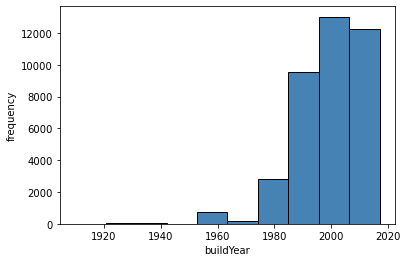

In [7]:
# there are 2808 missing values in "buildYear" ,we can look up the value distribution in "buildYear"
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#the value distribution of "buildYear" in whole dataset
plt.hist(x = df.buildYear,
         color = 'steelblue',
         edgecolor = 'black' 
         )
plt.xlabel('buildYear')
plt.ylabel('frequency')
plt.show()




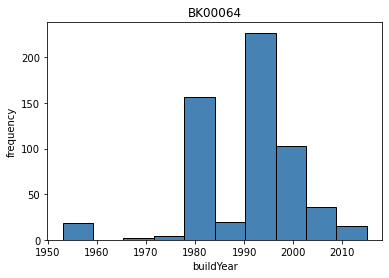

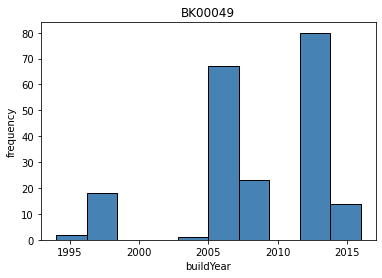

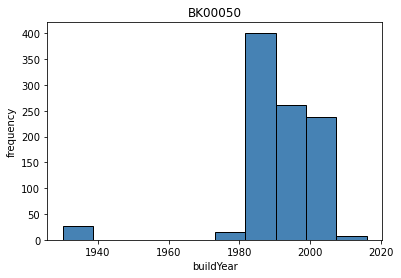

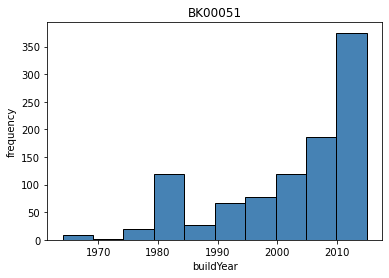

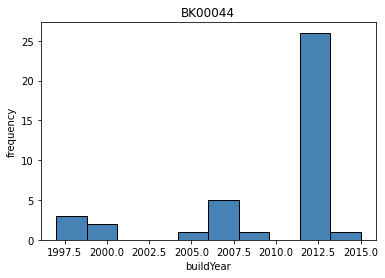

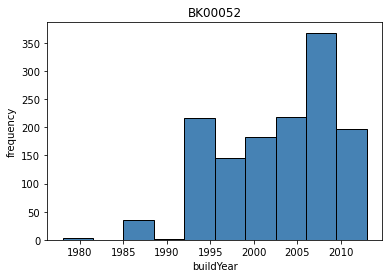

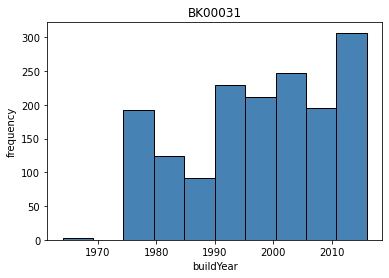

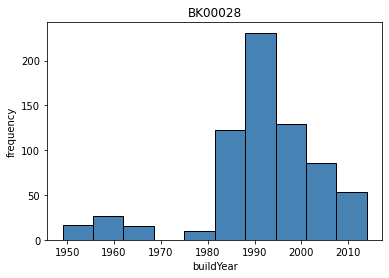

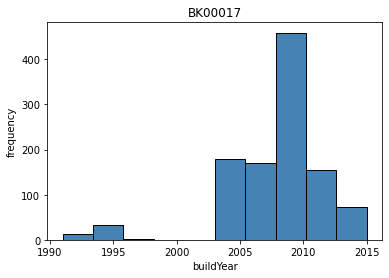

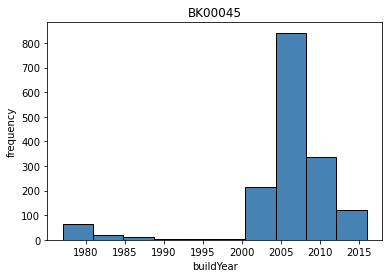

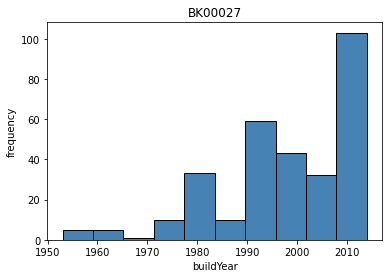

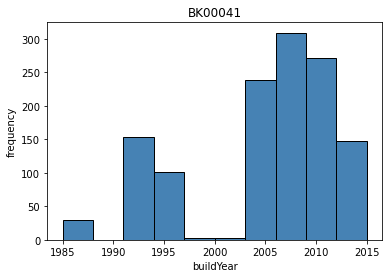

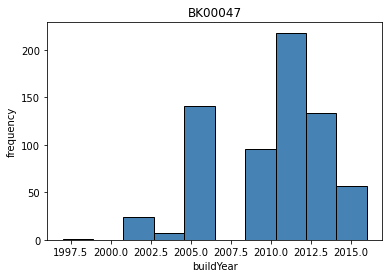

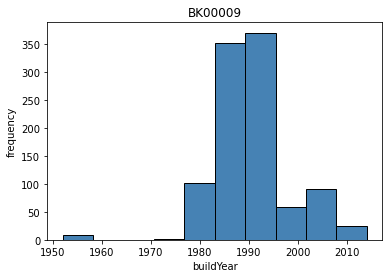

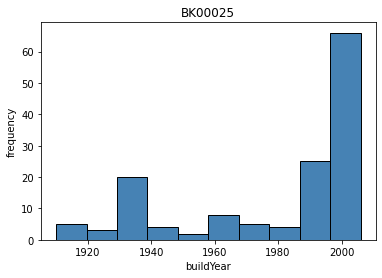

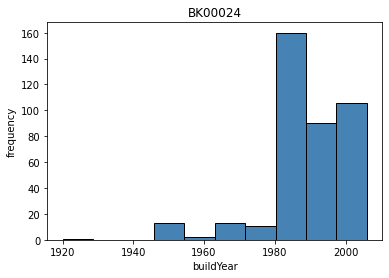

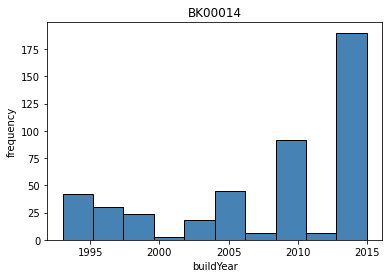

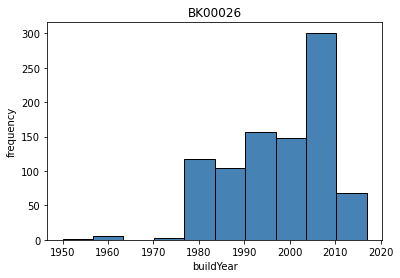

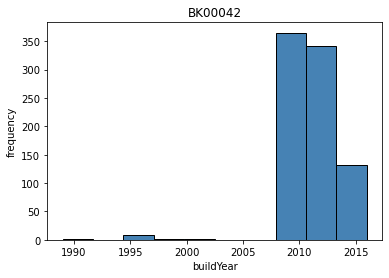

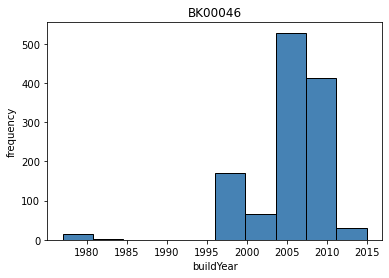

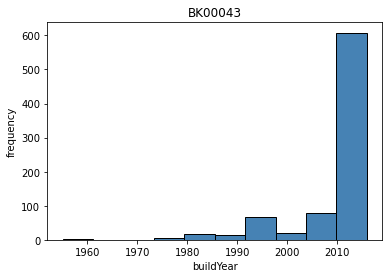

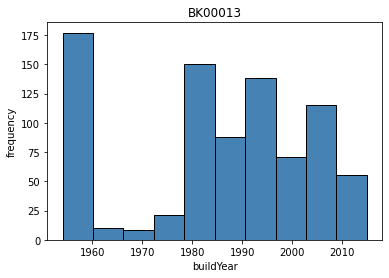

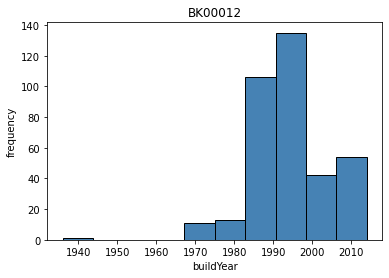

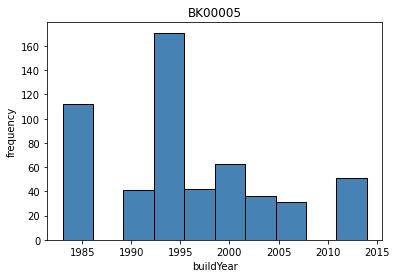

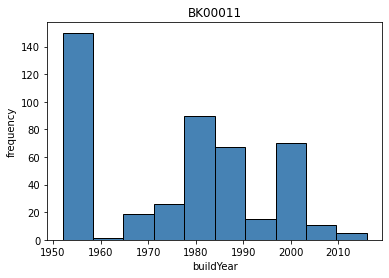

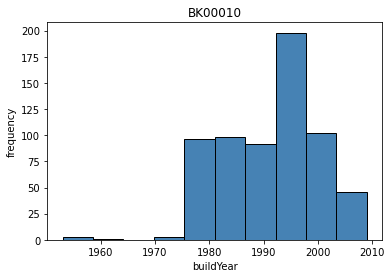

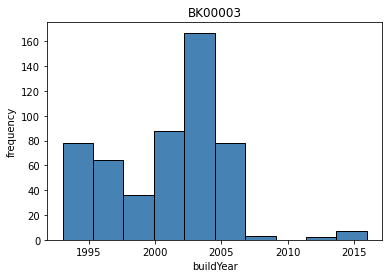

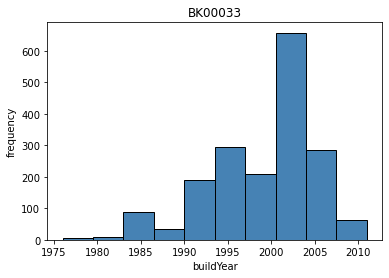

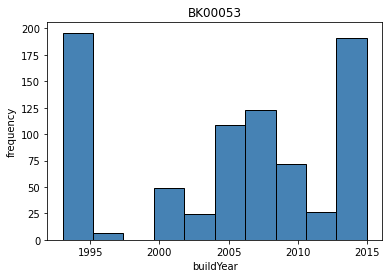

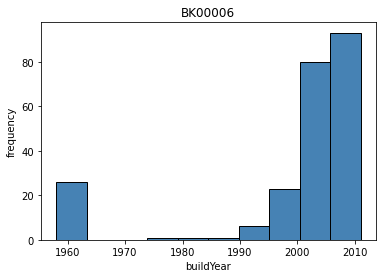

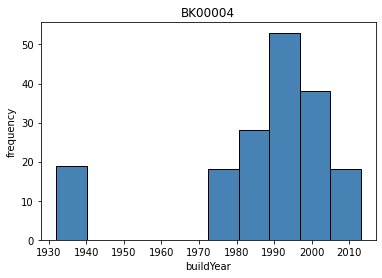

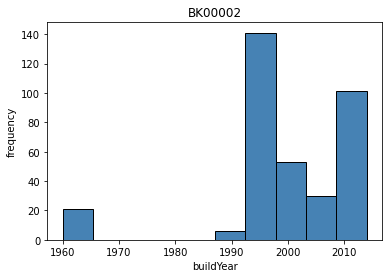

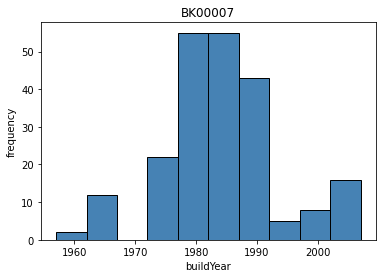

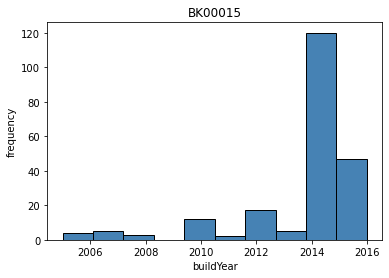

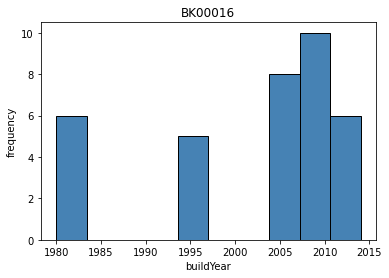

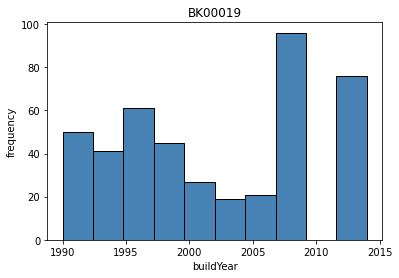

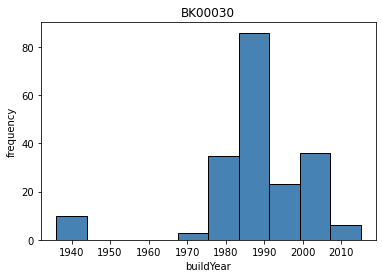

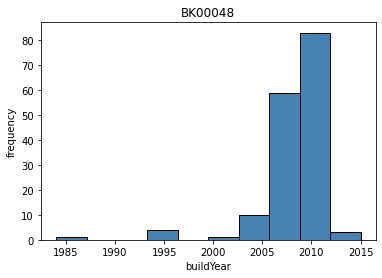

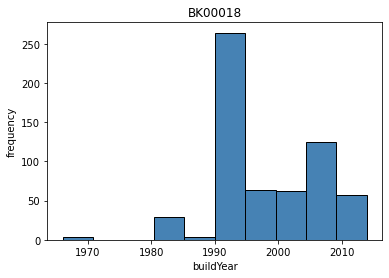

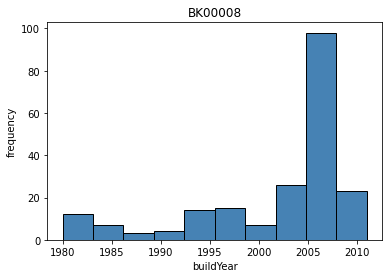

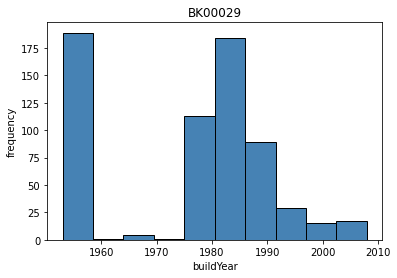

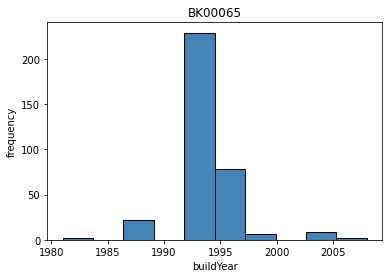

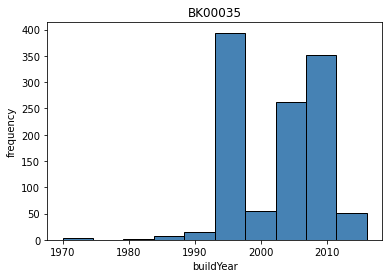

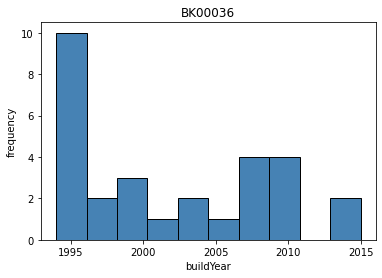

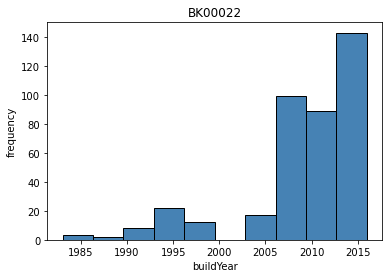

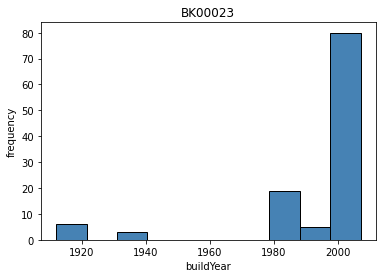

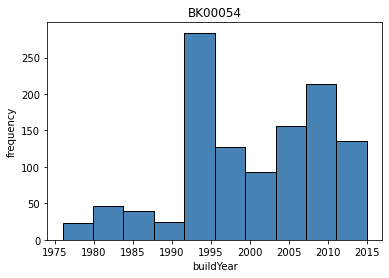

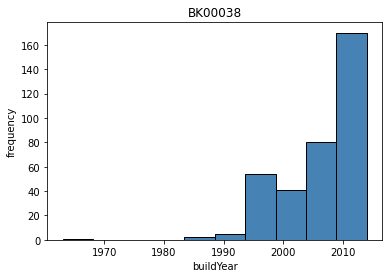

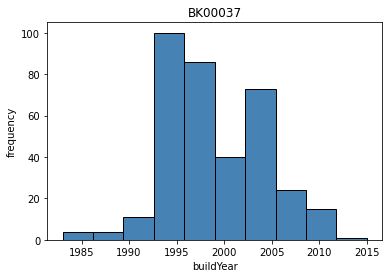

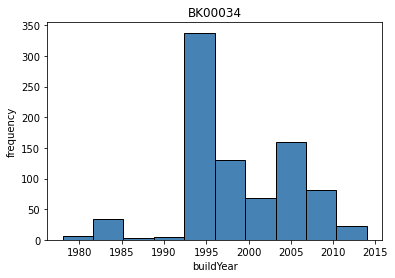

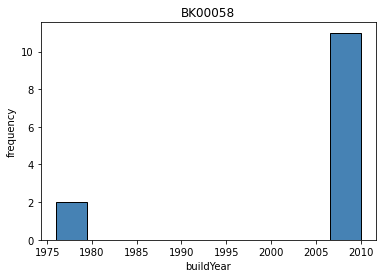

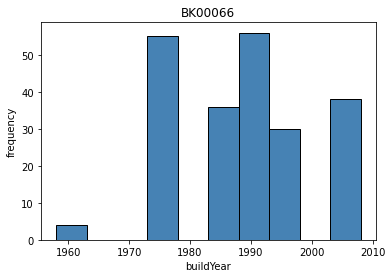

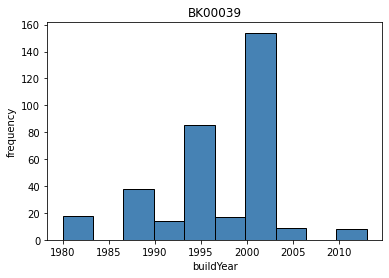

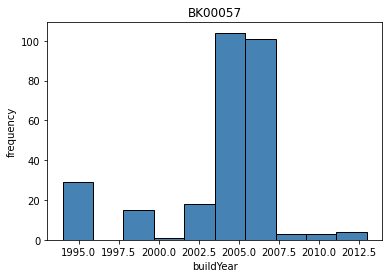

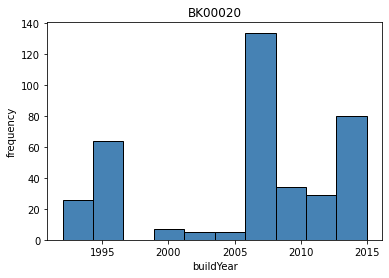

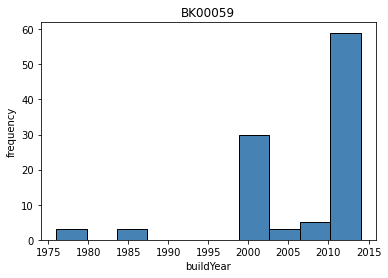

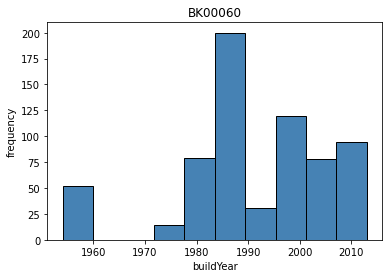

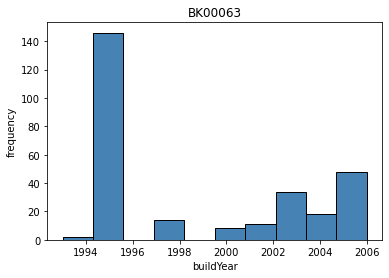

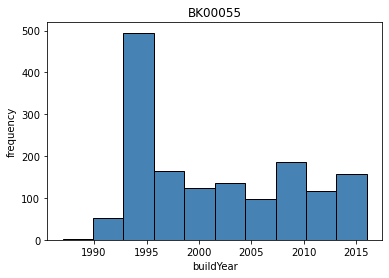

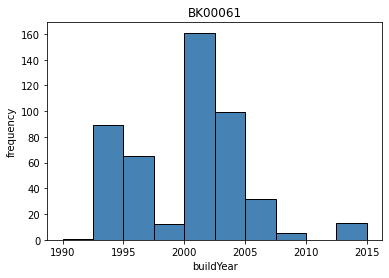

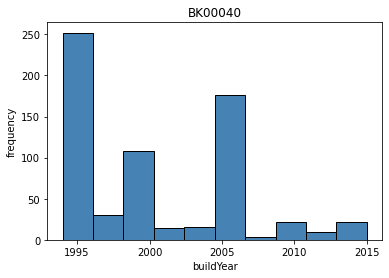

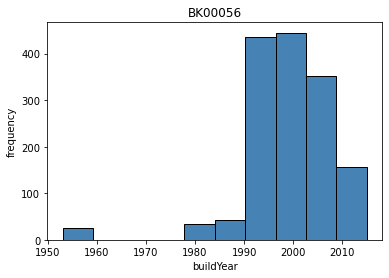

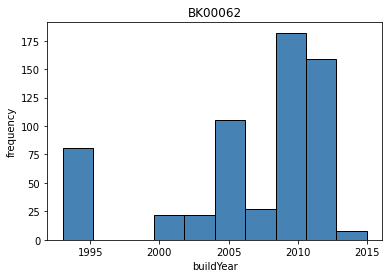

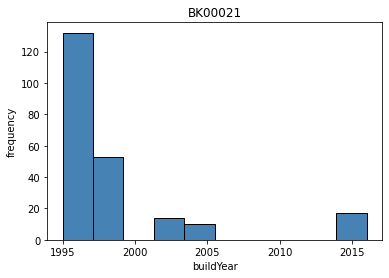

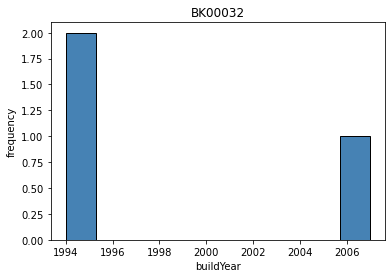

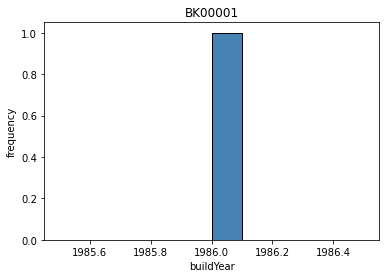

In [8]:
#the value distribution of "buildYear" group by "plate"
for i in df['plate'].unique():
    temp_plate = df[df['plate']==i]
    plt.hist(x = temp_plate.buildYear,
         color = 'steelblue',
         edgecolor = 'black' 
         )
    
    plt.xlabel('buildYear')
    plt.ylabel('frequency')
    plt.title(i)
    plt.show()

In [9]:
'''from the distribution result,we can see the build year distribution is largely different from different plate,
so we will fill nan values in "buildYear" according to mode of 'buildYear' group by "plate"'''

import math
import re
#define how to get mode of values
def mode1(x):
    restult = np.mean(pd.Series.mode(x))
    return restult
#fill nan values in 'buildYear' according to mode of 'buildYear' group by 'plate'
def BuildYear_NAProcess(df):
    List_clean = list(df['buildYear'].map(lambda x:False if math.isnan(x) else True))
    df_clean = df.loc[List_clean]
    MeanYear_plate = df_clean.pivot_table(index='plate',values='buildYear',aggfunc=mode1).reset_index()
    MeanYear_plate['buildYear'] = MeanYear_plate['buildYear'].map(lambda x:math.ceil(x))
    List_na = df['buildYear'].map(lambda x:math.isnan(x))
    df_na = df.loc[List_na].drop(['buildYear'],axis=1)
    df_na = df_na.merge(MeanYear_plate,on='plate',how='left')
    df = df_clean.append(df_na)
    df['buildYear'] = df['buildYear'].map(lambda x:int(x))
    return df

#divide the 'houseType' into three attributes:'livingroom','bedroom','bathroom'
def process_houseType(df_process):
    list_bedroom = []
    list_livingroom = []
    list_bathroom = []
    list_ID = []
    for index, row in df_process.iterrows():
        Id_str = row['ID']
        list_ID.append(Id_str)
        house_str = row['houseType']
        list_num = re.findall('[0-9]+', house_str)
        list_bedroom.append(list_num[0])
        list_livingroom.append(list_num[1])
        list_bathroom.append(list_num[2])
    dict_room = {"ID": list_ID,"bedroom": list_bedroom, "livingroom": list_livingroom, "bathroom": list_bathroom}
    df_room = pd.DataFrame(dict_room)
    df_res = df_process.merge(df_room,on='ID',how='inner')
    df_res.drop(['houseType'], axis=1, inplace=True)
    return df_res

df = BuildYear_NAProcess(df)
df = process_houseType(df)

    
    

In [10]:
# look up which attribute has missing values 
df.isnull().sum().sort_values(ascending=False)

uv                    18
pv                    18
bathroom               0
saleSecHouseNum        0
shopNum                0
bankNum                0
gymNum                 0
drugStoreNum           0
hospitalNum            0
privateSchoolNum       0
schoolNum              0
interSchoolNum         0
busStationNum          0
subwayStationNum       0
plate                  0
buildYear              0
mallNum                0
region                 0
city                   0
communityName          0
houseDecoration        0
houseToward            0
totalFloor             0
houseFloor             0
rentType               0
area                   0
parkNum                0
totalTradeMoney        0
superMarketNum         0
tradeLandNum           0
bedroom                0
tradeMoney             0
tradeTime              0
lookNum                0
residentPopulation     0
newWorkers             0
totalWorkers           0
landMeanPrice          0
landTotalPrice         0
tradeLandArea          0


In [11]:
'''We decide to fill the missing values in "pv" and "uv" simply by their mean values because the number of missing values is too few'''
# fill nan values in 'pv' and 'uv'
df['pv'].fillna(df['pv'].mean(),inplace=True)
df['uv'].fillna(df['uv'].mean(),inplace=True)
df['pv'] = df['pv'].astype('int')
df['uv'] = df['uv'].astype('int')
# drop 'city' because it has only one value
df.drop('city',axis=1,inplace=True)

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# find the proportions of target value
num = len(df)
for i in range(1, 10):
    s = i*5000
    print('{:<6}: {:.5f}'.format(s, len(df[df['tradeMoney'] < s]) / num))

5000  : 0.68445
10000 : 0.93318
15000 : 0.97179
20000 : 0.98624
25000 : 0.99208
30000 : 0.99534
35000 : 0.99691
40000 : 0.99771
45000 : 0.99797


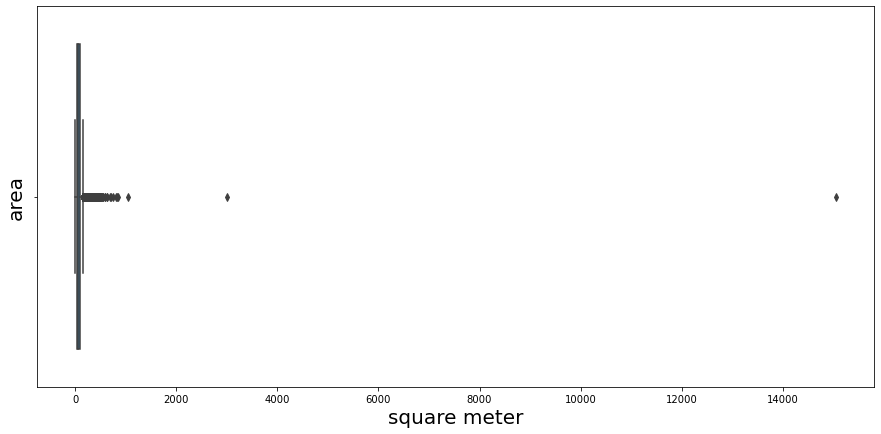

<AxesSubplot:xlabel='area', ylabel='Density'>

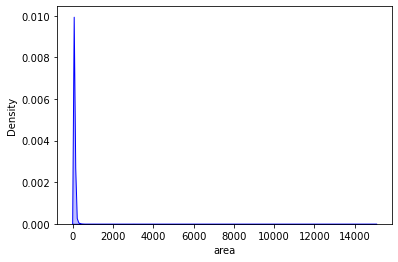

In [13]:
# look up the outlier of 'area'
plt.figure(figsize=(15,7))
sns.boxplot('area',data=df,orient='h')
plt.ylabel('area',fontsize=20.0)
plt.xlabel('square meter',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['area'], color="Blue", shade= True)

In [14]:
'''There are some extreme values,so we decided to use IQR rule to delete the outliers'''
def IQRule(df_one):
    q1 = df_one.describe()["25%"]
    q3 = df_one.describe()["75%"]
    s = (q3-q1)*1.5
    LB = q1 - s
    UB = q3 + s
    return[LB,UB]
bound = IQRule(df['area'])
bound
#adjust the dataset to remove a part of outlier according to IQR rule
df = df[(df['area']<=bound[1])&(df['area']>bound[0])]

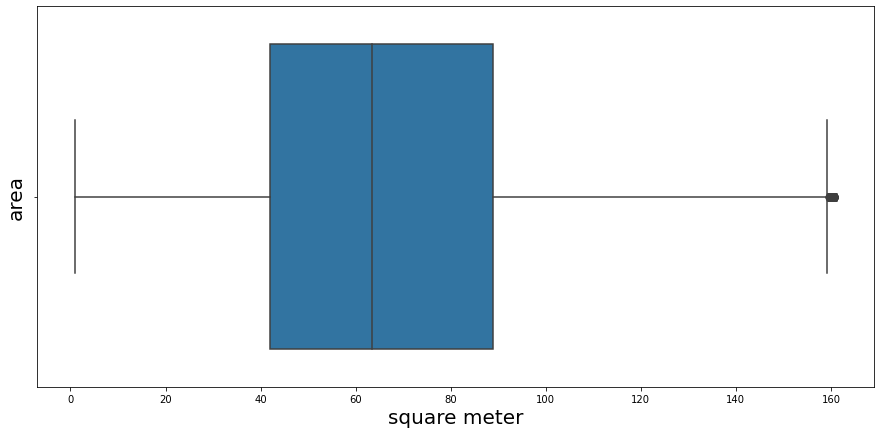

(40154, 52)

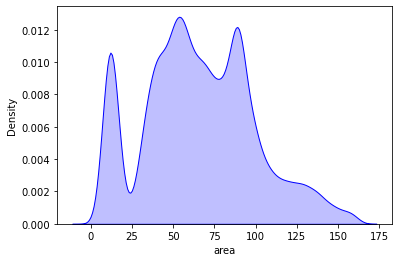

In [15]:
# look up the outlier of 'area'
plt.figure(figsize=(15,7))
sns.boxplot('area',data=df,orient='h')
plt.ylabel('area',fontsize=20.0)
plt.xlabel('square meter',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['area'], color="Blue", shade= True)
df.shape

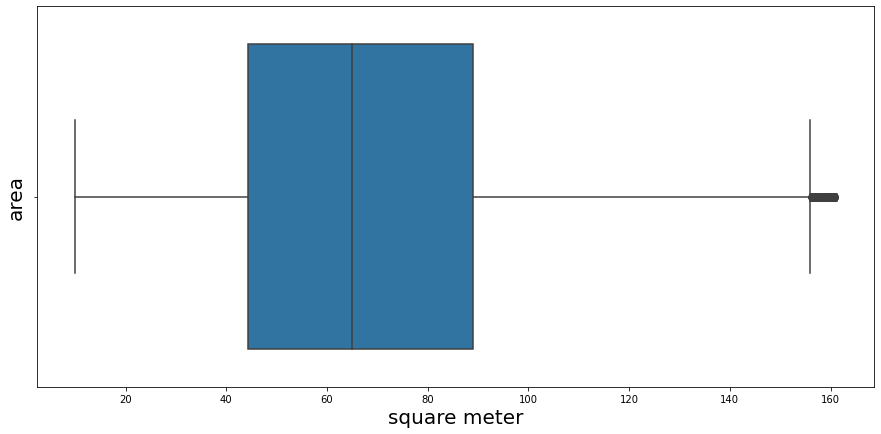

(38824, 52)

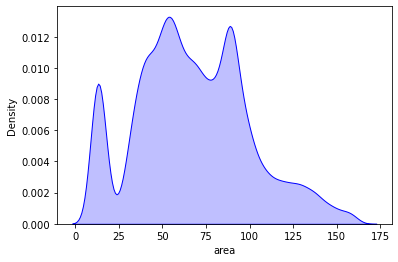

In [16]:
#In real world ,there are no negative values in "area",so we need to adjust the "area" again
df = df[df['area']>10]
# look up the outlier of 'area'
plt.figure(figsize=(15,7))
sns.boxplot('area',data=df,orient='h')
plt.ylabel('area',fontsize=20.0)
plt.xlabel('square meter',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['area'], color="Blue", shade= True)
df.shape

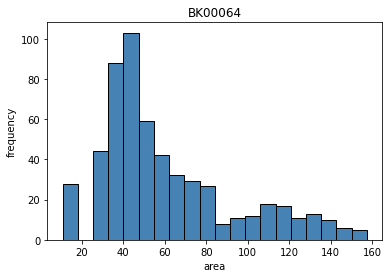

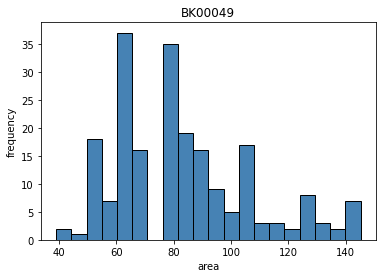

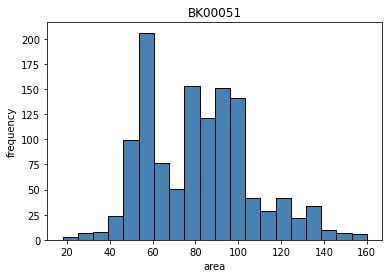

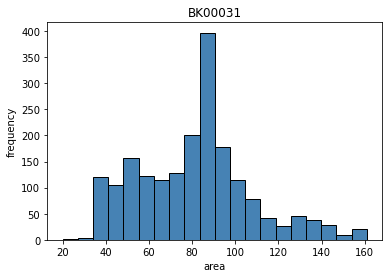

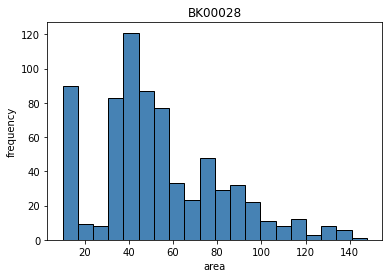

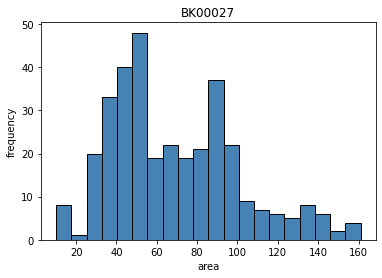

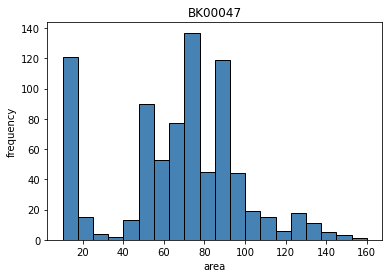

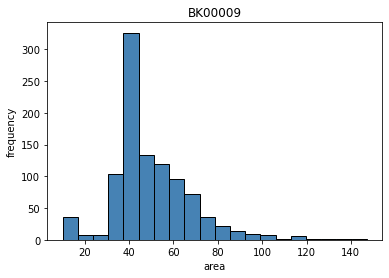

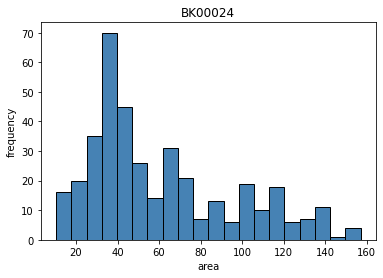

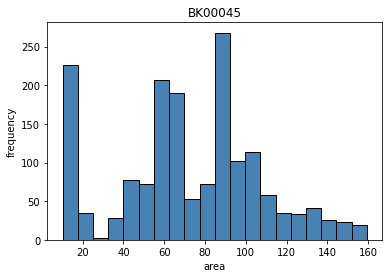

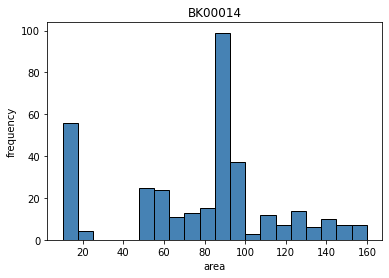

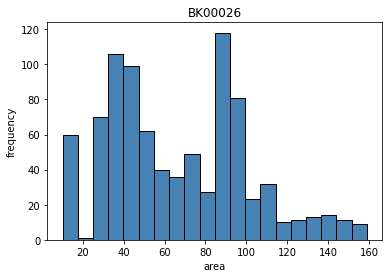

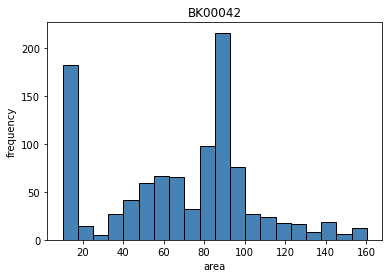

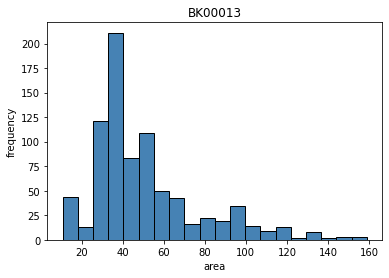

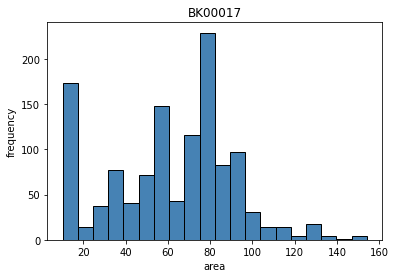

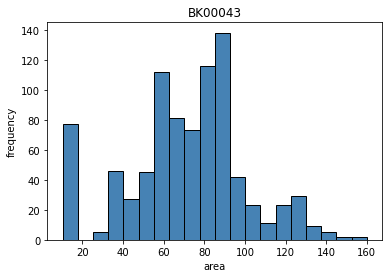

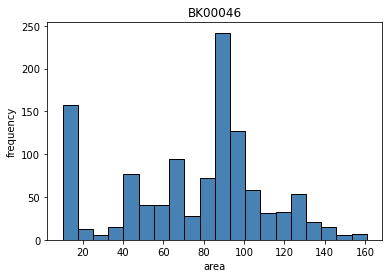

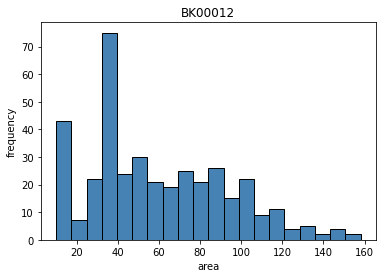

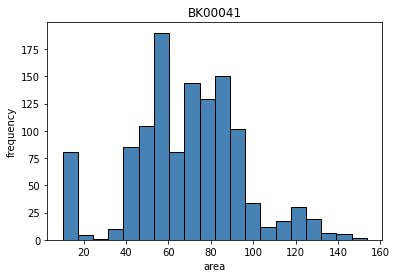

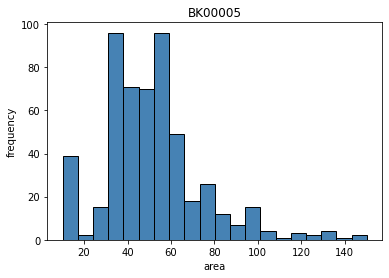

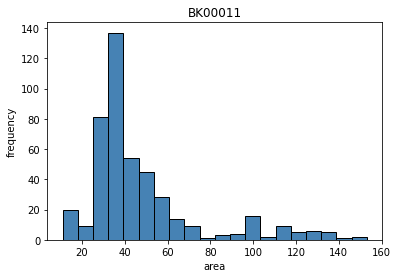

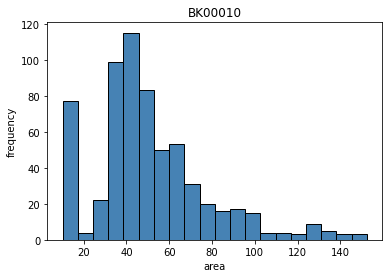

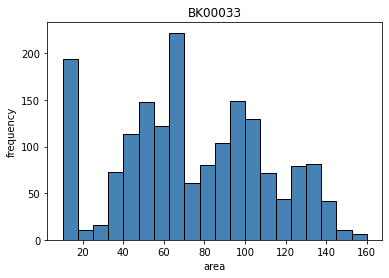

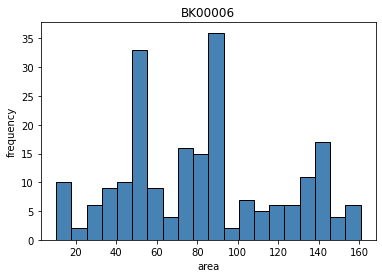

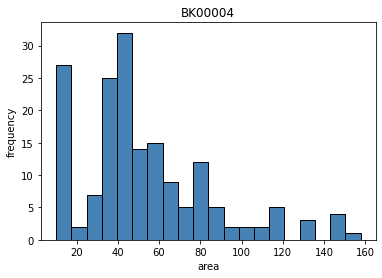

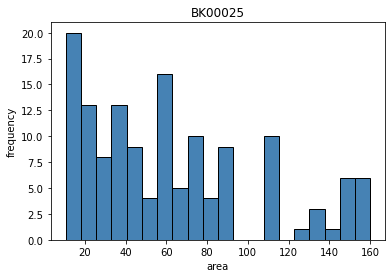

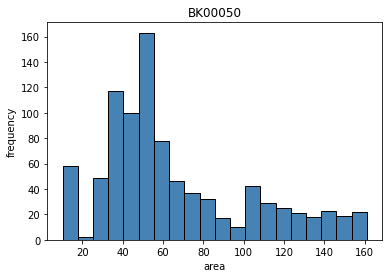

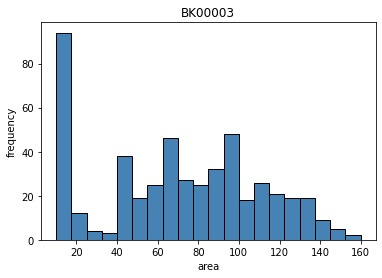

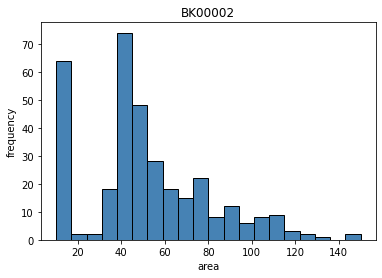

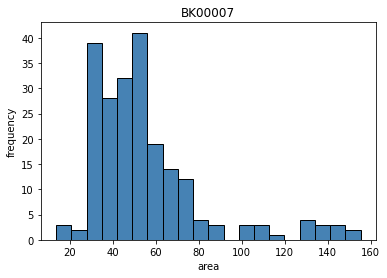

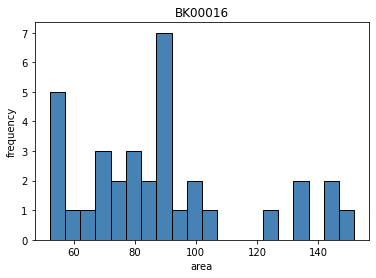

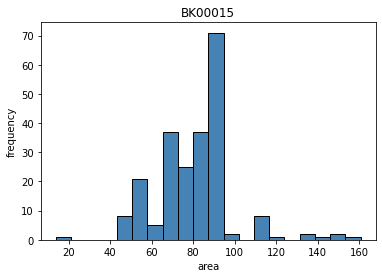

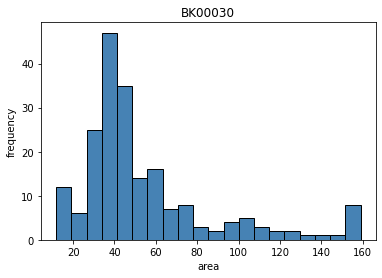

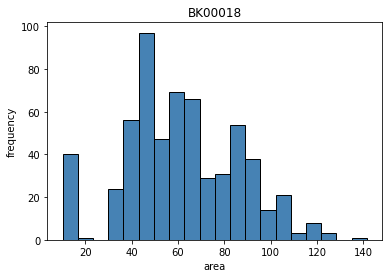

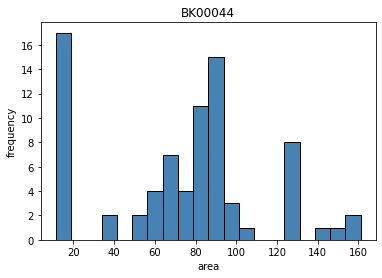

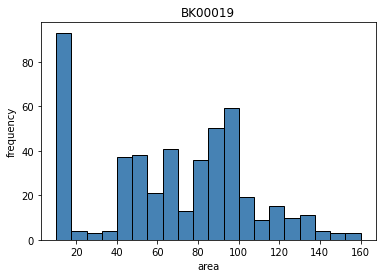

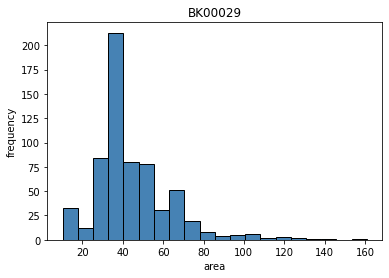

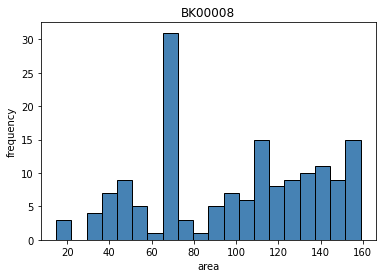

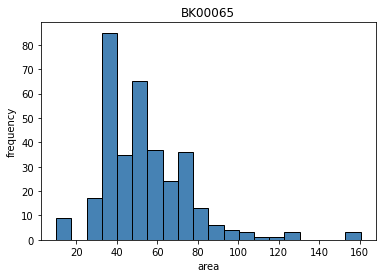

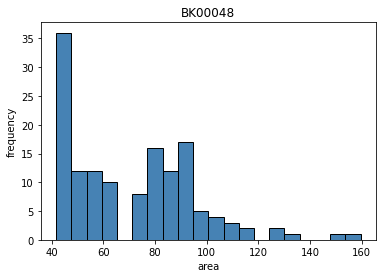

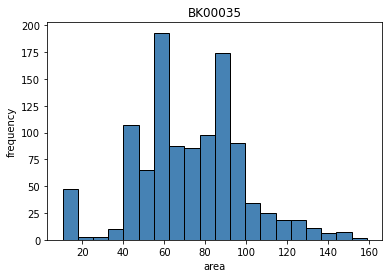

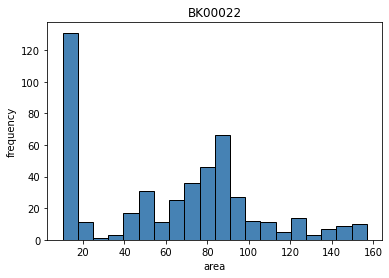

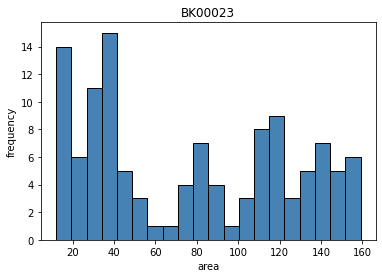

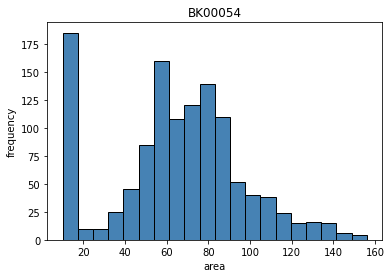

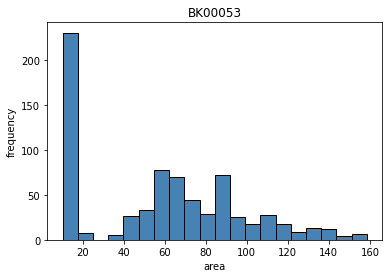

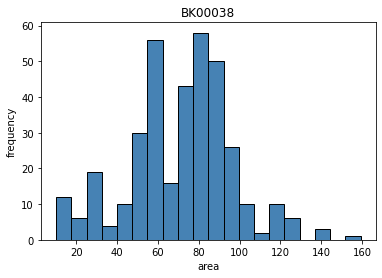

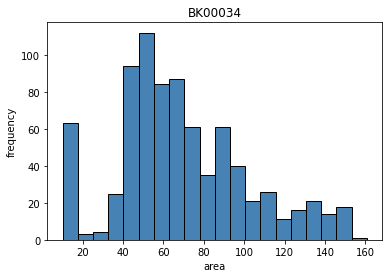

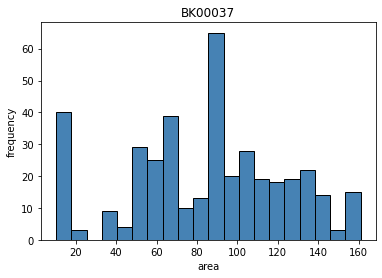

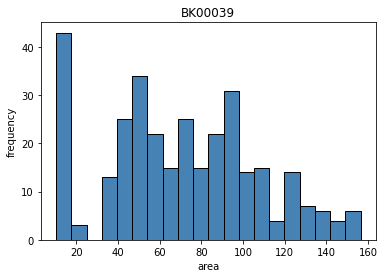

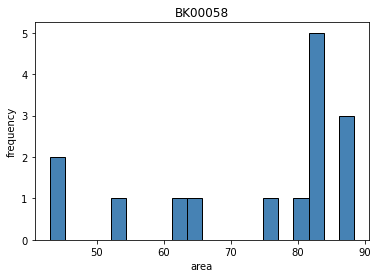

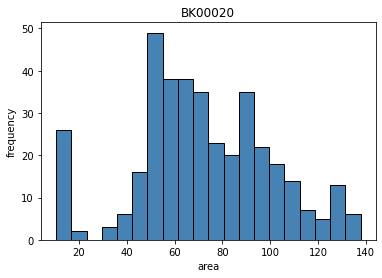

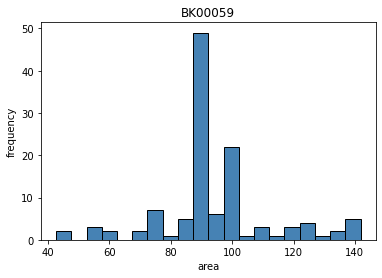

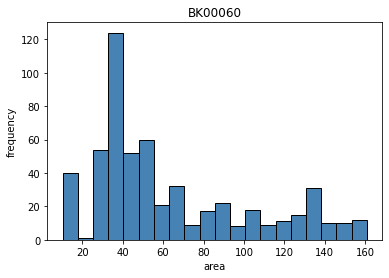

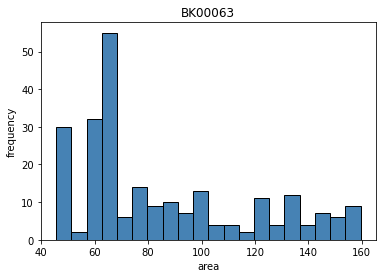

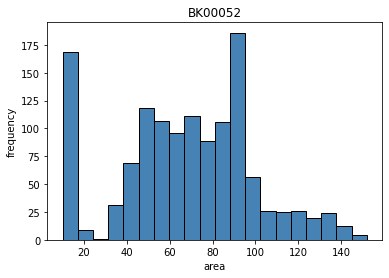

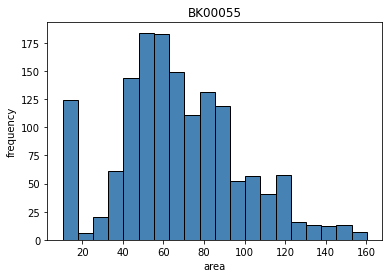

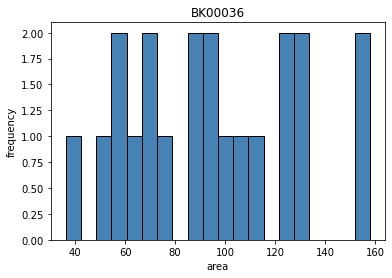

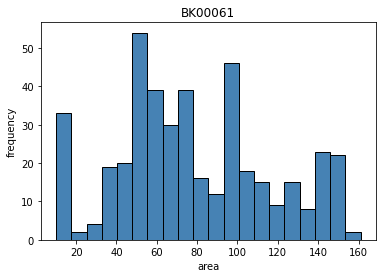

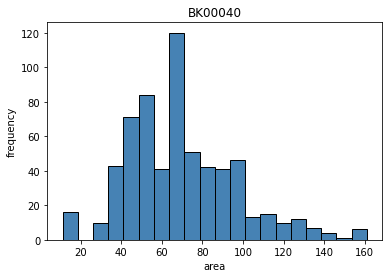

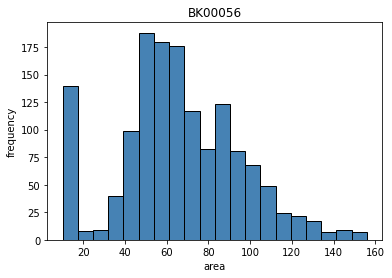

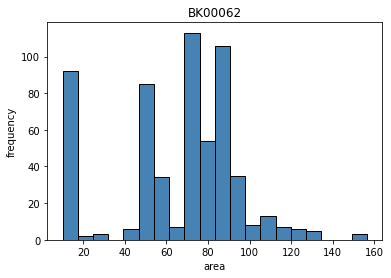

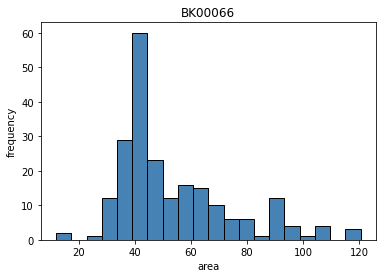

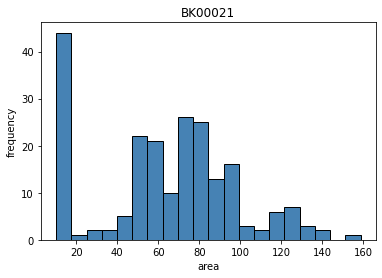

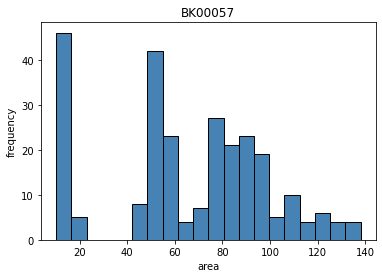

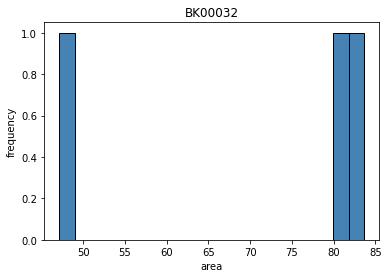

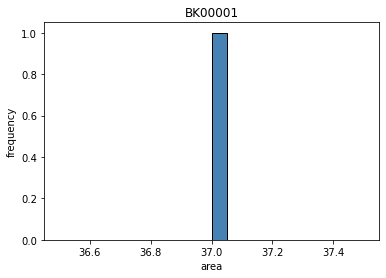

In [17]:
#look up the value distribution of "area" group by "plate"
for i in df['plate'].unique():
    temp_plate = df[df['plate']==i]
    plt.hist(x = temp_plate.area,bins=20,color = 'steelblue',edgecolor = 'black')
    plt.xlabel('area')
    plt.ylabel('frequency')
    plt.title(i)
    plt.show()

(3869, 52)

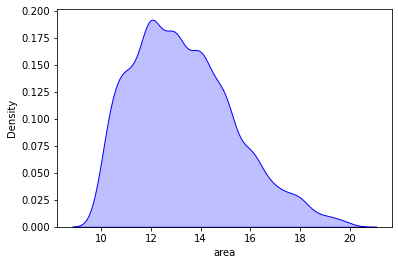

In [18]:
'''from the distribution of area we can see the area less than 20 conform normal distribution ,
so we look up their distribution to research why?'''
df_area20 = df[df['area']<20]
#look up the distribution of area 
sns.kdeplot(df_area20['area'], color="Blue", shade= True)
df_area20.shape


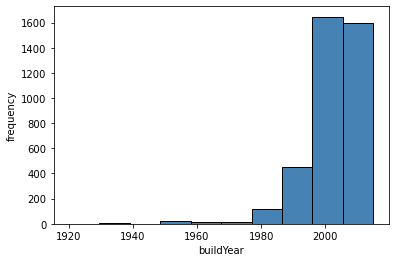

In [19]:
#look up the distribution of buildYear 
plt.hist(x = df_area20.buildYear,color = 'steelblue',edgecolor = 'black')
plt.xlabel('buildYear')
plt.ylabel('frequency')
plt.show()

In [20]:
'''we can see from the result the areas less than 20 conform norm distribution and most of houses whose area is less than 20 were built
 during 1995-2010'''

'we can see from the result the areas less than 20 conform norm distribution and most of houses whose area is less than 20 were built\n during 1995-2010'

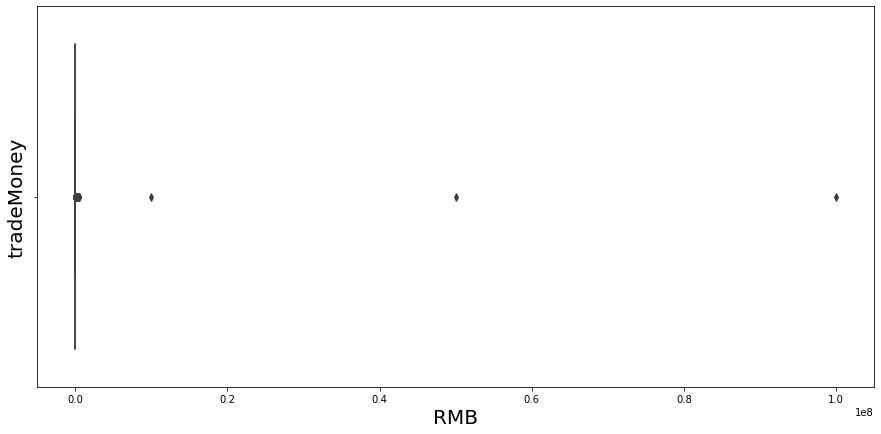

(38824, 52)

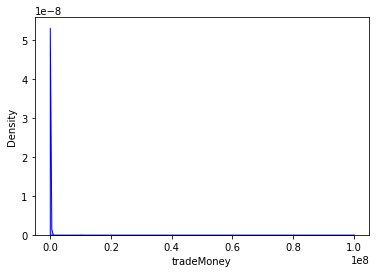

In [21]:
# look up the outlier of target attribute 'tradeMoney'
plt.figure(figsize=(15,7))
sns.boxplot('tradeMoney',data=df,orient='h')
plt.ylabel('tradeMoney',fontsize=20.0)
plt.xlabel('RMB',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['tradeMoney'], color="Blue", shade= True)
df.shape


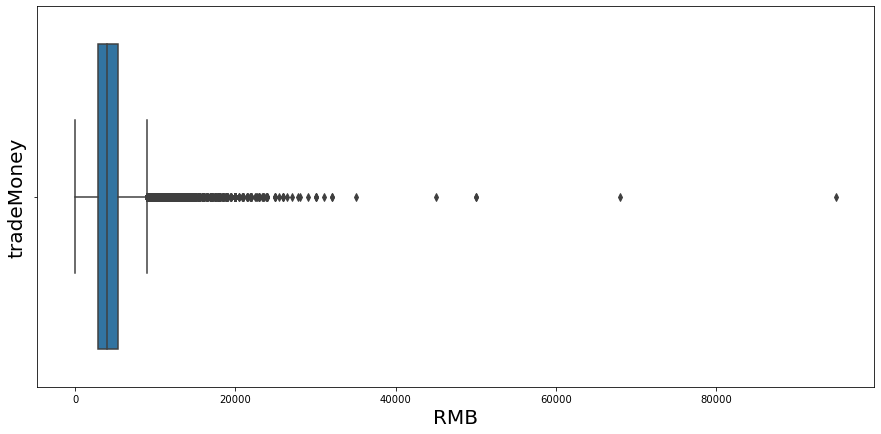

(38808, 52)

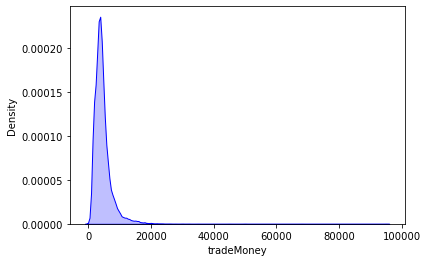

In [22]:
#we can see from the boxplot that there three very extreme values in trademoney ,
#so we need to adjust the dataset to remove this three values
df = df[df['tradeMoney']<=100000]
# look up the outlier of target attribute 'tradeMoney'
plt.figure(figsize=(15,7))
sns.boxplot('tradeMoney',data=df,orient='h')
plt.ylabel('tradeMoney',fontsize=20.0)
plt.xlabel('RMB',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['tradeMoney'], color="Blue", shade= True)
df.shape

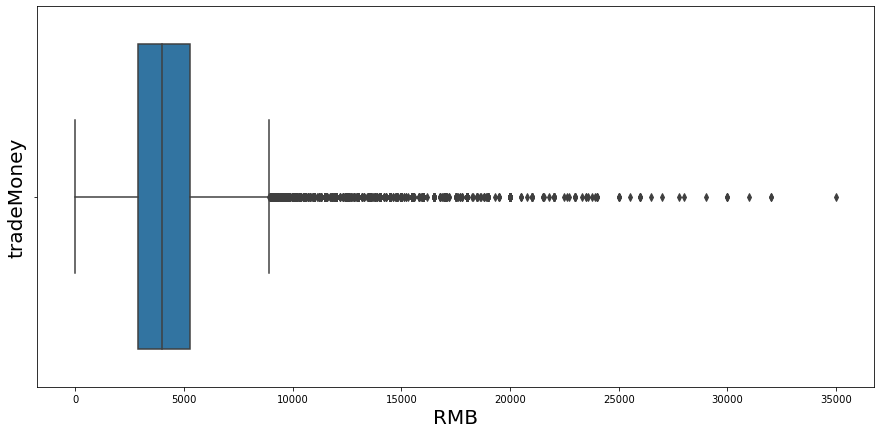

(38803, 52)

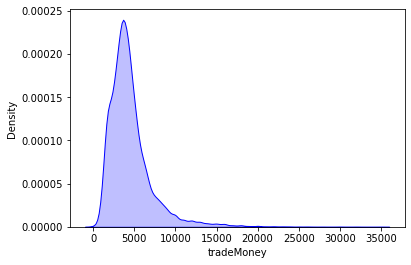

In [23]:
#we can see from the boxplot that there still a few very extreme values in trademoney ,
#so we need to adjust the dataset to remove these values
df = df[df['tradeMoney']<=35000]
# look up the outlier of target attribute 'tradeMoney'
plt.figure(figsize=(15,7))
sns.boxplot('tradeMoney',data=df,orient='h')
plt.ylabel('tradeMoney',fontsize=20.0)
plt.xlabel('RMB',fontsize=20.0)
plt.yticks(fontsize=15.0)
plt.show()
# look up the distribution of 'area'
sns.kdeplot(df['tradeMoney'], color="Blue", shade= True)
df.shape

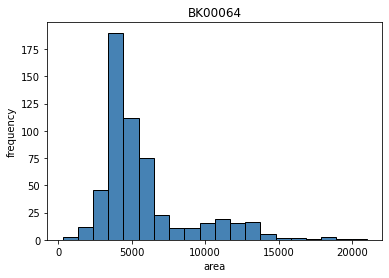

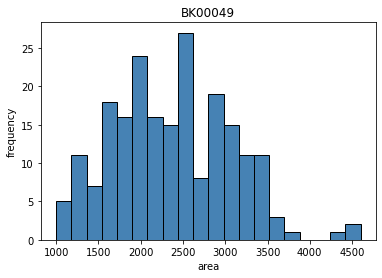

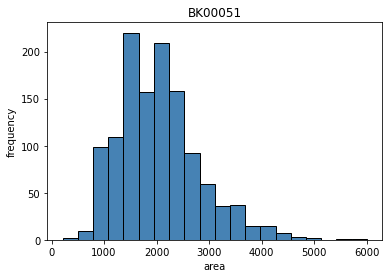

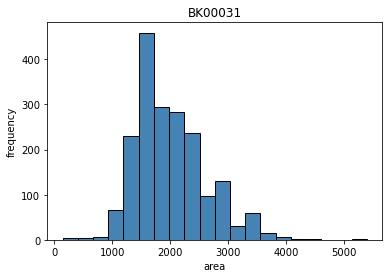

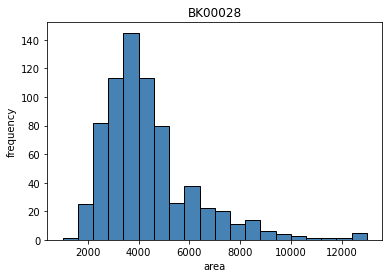

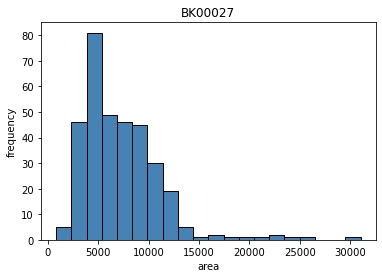

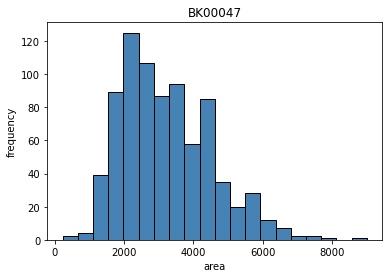

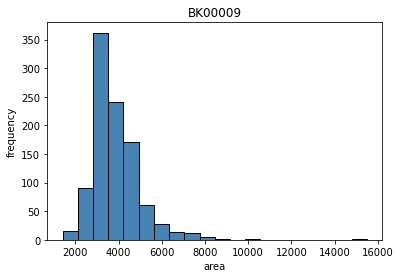

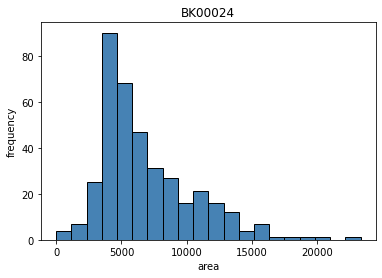

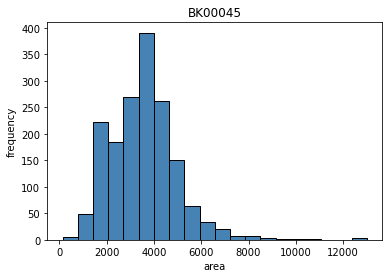

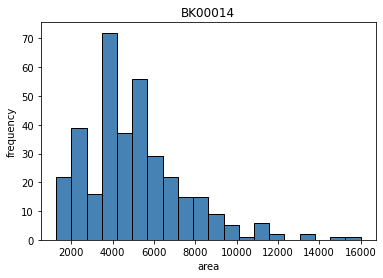

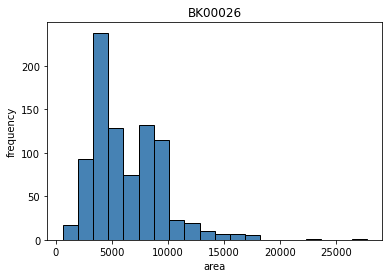

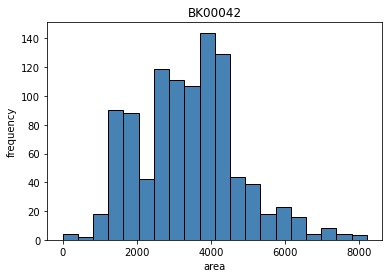

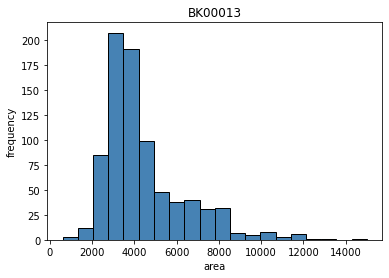

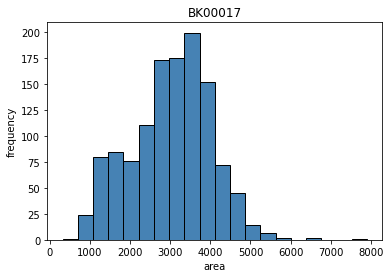

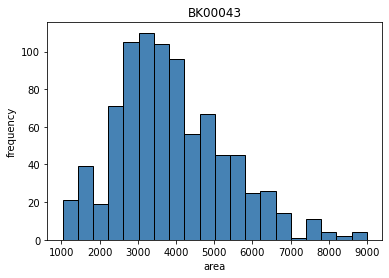

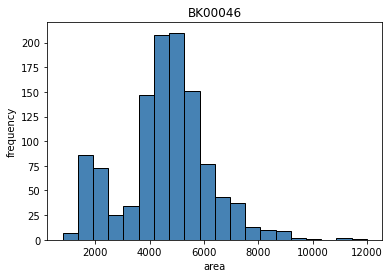

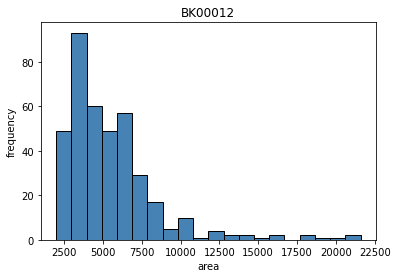

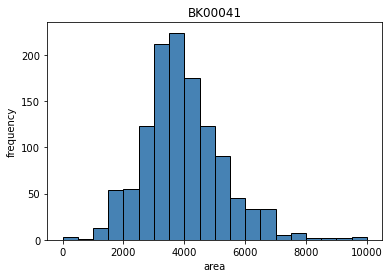

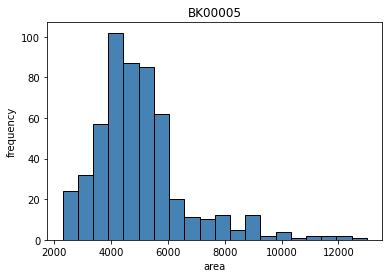

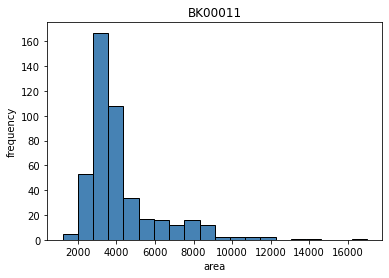

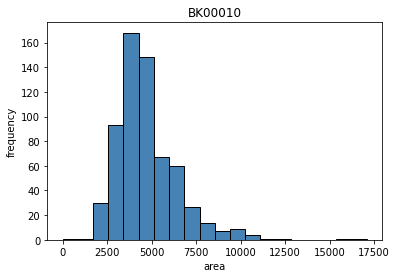

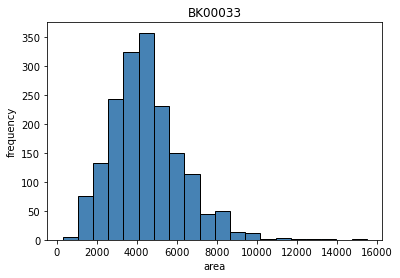

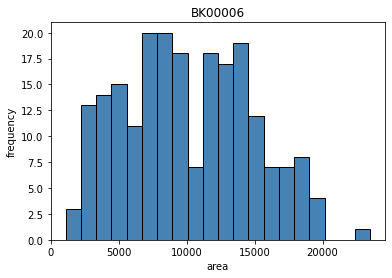

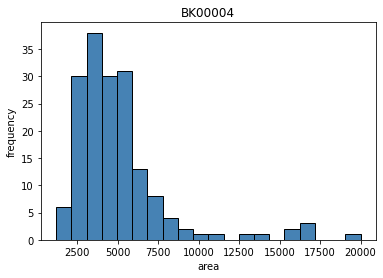

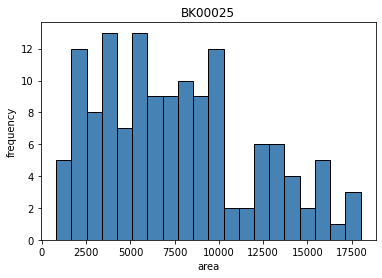

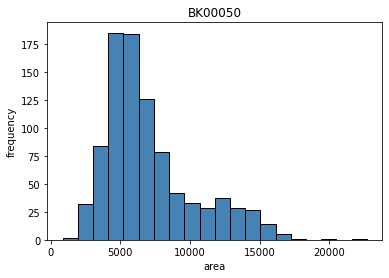

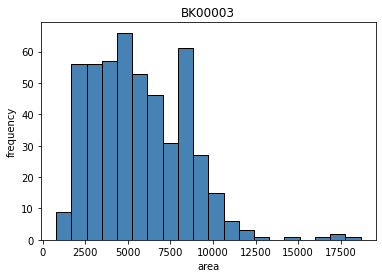

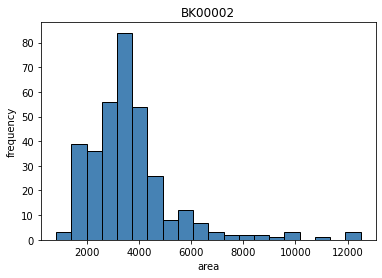

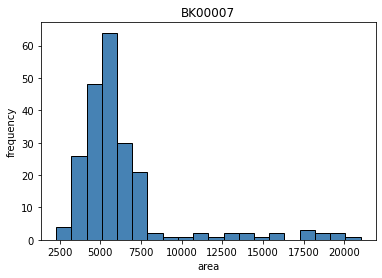

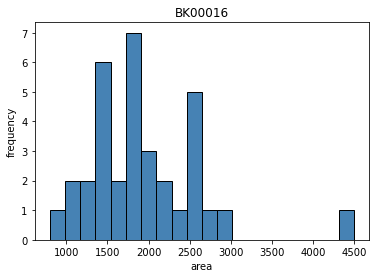

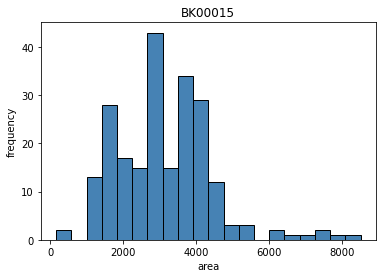

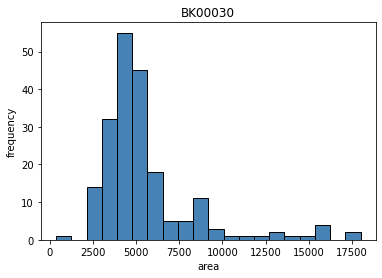

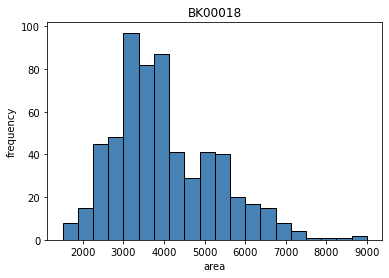

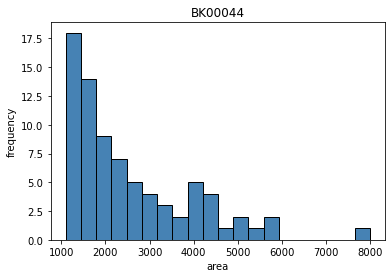

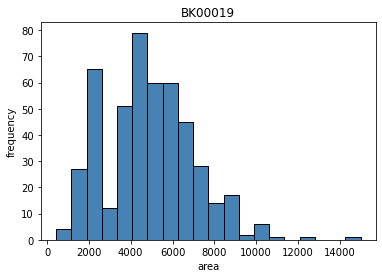

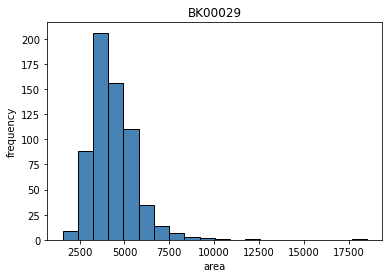

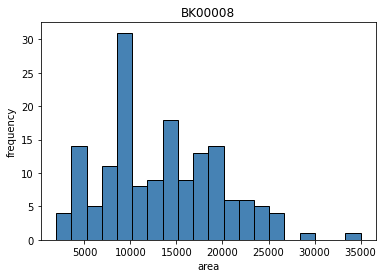

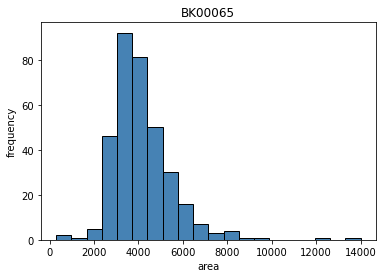

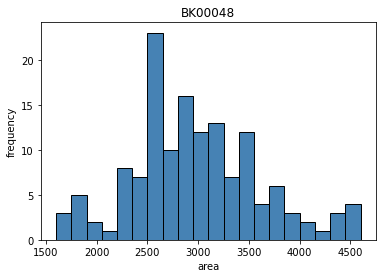

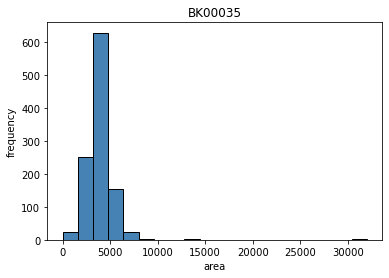

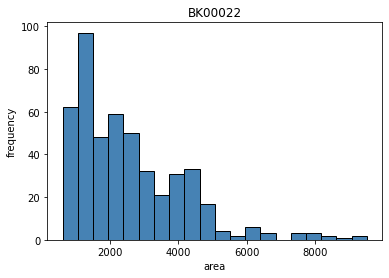

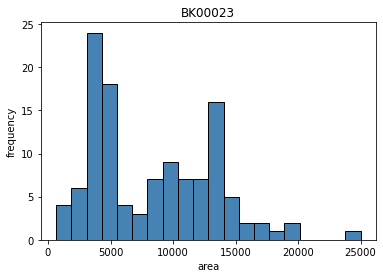

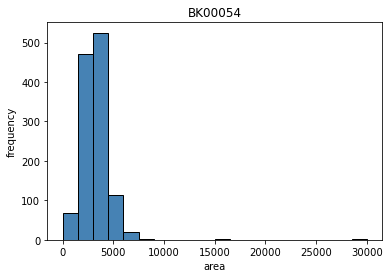

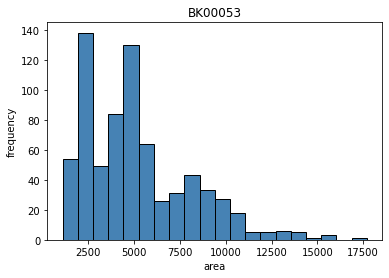

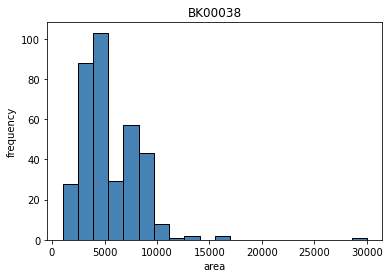

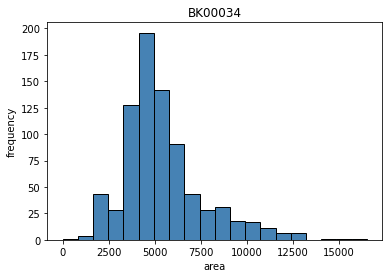

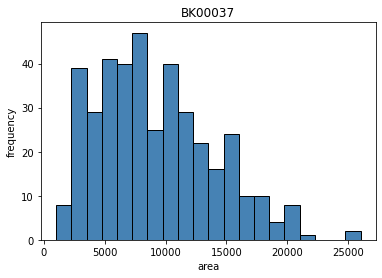

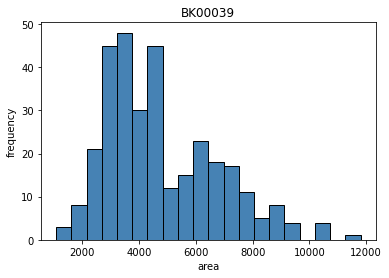

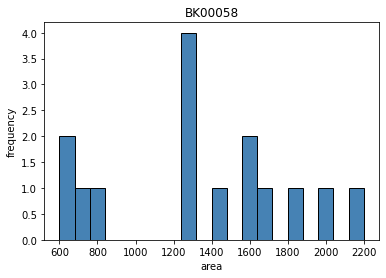

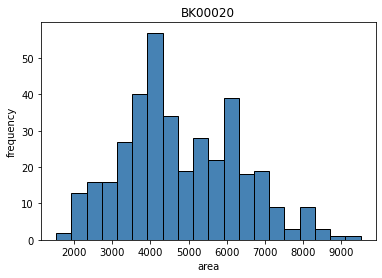

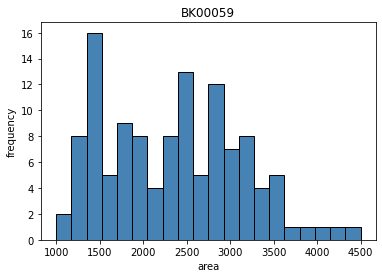

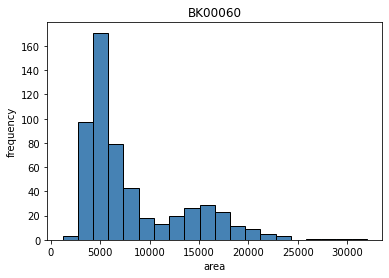

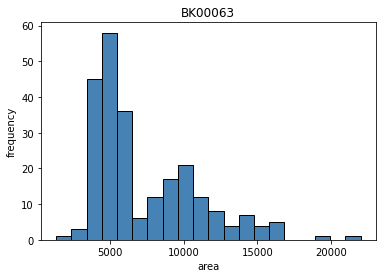

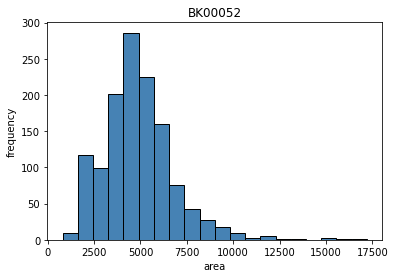

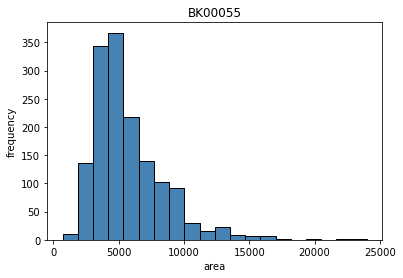

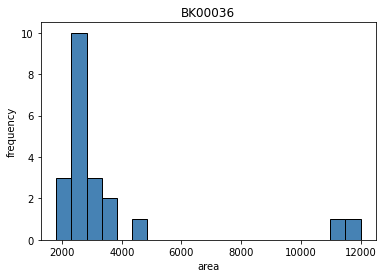

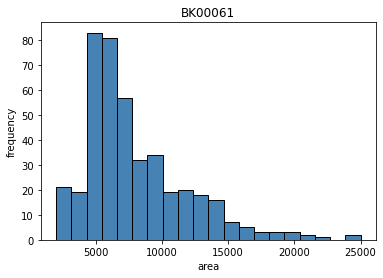

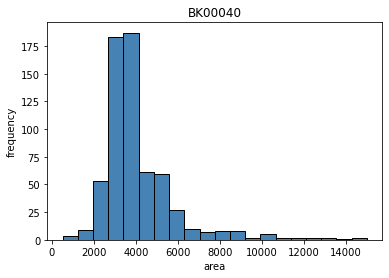

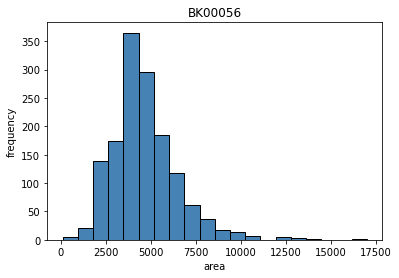

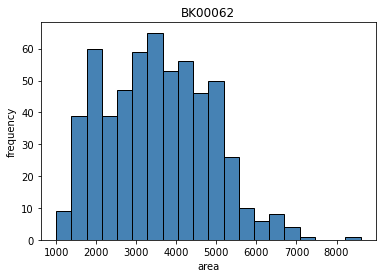

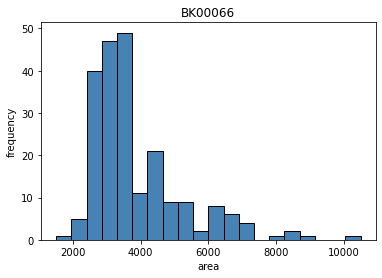

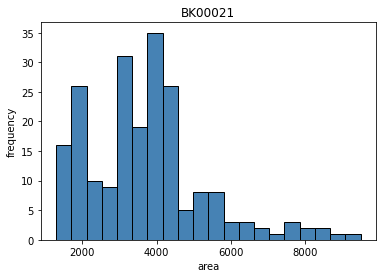

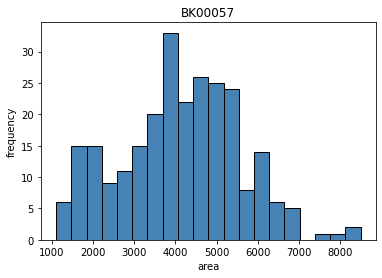

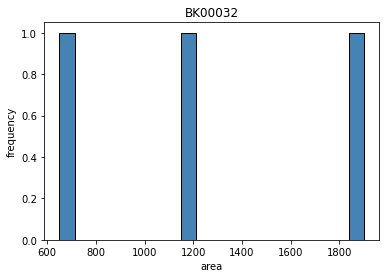

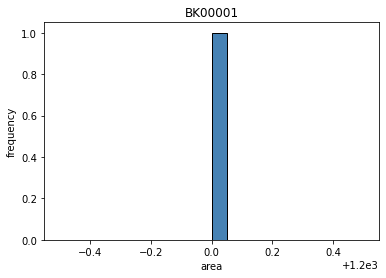

In [24]:
# look up the distribution of trade money in different plates.
for i in df['plate'].unique():
    temp_plate = df[df['plate']==i]
    plt.hist(x = temp_plate.tradeMoney,bins=20,color = 'steelblue',edgecolor = 'black')
    plt.xlabel('area')
    plt.ylabel('frequency')
    plt.title(i)
    plt.show()

In [25]:
# check whether each value of "communityName"  corresponds only one value of "plate"
df_check = df[['communityName','plate']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['communityName'].unique())):
    print('each value of "communityName"  corresponds only one value of "plate"')
else:
    print('each value of "communityName"  does not correspond only one value of "plate"')

each value of "communityName"  corresponds only one value of "plate"


In [26]:
# check whether each value of "plate"  corresponds only one value of "region"
df_check = df[['region','plate']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['plate'].unique())):
    print('each value of "plate"  corresponds only one value of "region"')
else:
    print('each value of "plate"  does not correspond only one value of "region"')

each value of "plate"  corresponds only one value of "region"


In [27]:
#check whether each value of "plate"  corresponds only one series of value in attributes which describe neighbor facilitiy number
df_check = df[['plate','subwayStationNum', 'busStationNum', 'interSchoolNum','schoolNum', 'privateSchoolNum',
               'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['plate'].unique())):
    print('each value of "plate"  corresponds only one series of value describing neighbor facilitiy number')
else:
    print('each value of "plate"  does not correspond only one series of value describing neighbor facilitiy number')

each value of "plate"  corresponds only one series of value describing neighbor facilitiy number


In [28]:
#check whether each value of "plate"  corresponds only one series of value in attributes which describe house trade in plate

df_check = df[['plate', 'saleSecHouseNum','totalTradeMoney', 'totalTradeArea',
        'tradeMeanPrice','tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea',
       'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum',
       'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea',
       'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
       'residentPopulation', 'pv', 'uv', 'lookNum']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==len(list(df['plate'].unique())):
    print('each value of "plate"  corresponds only one series of value describing house trade')
else:
    print('each value of "plate"  does not correspond only one series of value describing house trade')


each value of "plate"  does not correspond only one series of value describing house trade


In [29]:
#according to the official attribute description ,we decide to add a column "tradeMonth" to the dataset which extracted the month from "tradeTime"
df['tradeMonth'] = df['tradeTime'].map(lambda x: str(x).split('/')[1])
##check whether each value of "plate" and "tradeMonth" corresponds only one series of value in attributes which describe house trade in plate per month
df_check = df[['plate','tradeMonth','saleSecHouseNum','totalTradeMoney', 'totalTradeArea',
        'tradeMeanPrice','tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea',
       'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum',
       'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea',
       'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
       'residentPopulation', 'pv', 'uv', 'lookNum']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==df_check[['tradeMonth','plate']].drop_duplicates().shape[0]:
    print('each value of "plate" and "tradeMonth" corresponds only one series of value describing house trade')
else:
    print('each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade')


each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade


In [30]:
#the output said each value of "plate"  does not correspond only one series of value describing house trade in plate,
#so we decided to look up the relationoship between these attributes.
#randomly choose one plate "BK00046" to look up 
temp_plate_check = df_check[df_check['plate']=='BK00046']
for i in temp_plate_check['tradeMonth'].unique():
    temp_month = temp_plate_check[temp_plate_check['tradeMonth']==i]
    print(temp_month)

         plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
110    BK00046          5              0.0      534550000.0        16977.76   
1695   BK00046          5              0.0      534550000.0        16977.76   
1708   BK00046          5              0.0      534550000.0        16977.76   
1742   BK00046          5              0.0      534550000.0        16977.76   
1807   BK00046          5              0.0      534550000.0        16977.76   
1822   BK00046          5              0.0      534550000.0        16977.76   
7550   BK00046          5              0.0      534550000.0        16977.76   
35876  BK00046          5              0.0      534550000.0        16977.76   

       tradeMeanPrice  tradeSecNum  totalNewTradeMoney  totalNewTradeArea  \
110       31485.30784        198.0        1.209480e+09            28215.0   
1695      31485.30784        198.0        1.209480e+09            28215.0   
1708      31485.30784        198.0        1.209480e+09   

         plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
124    BK00046          2              0.0      259850000.0         7762.97   
151    BK00046          2              0.0      259850000.0         7762.97   
198    BK00046          2              0.0      259850000.0         7762.97   
7010   BK00046          2              0.0      259850000.0         7762.97   
7335   BK00046          2              0.0      259850000.0         7762.97   
7336   BK00046          2              0.0      259850000.0         7762.97   
7486   BK00046          2              0.0      259850000.0         7762.97   
7707   BK00046          2              0.0      259850000.0         7762.97   
9724   BK00046          2              0.0      259850000.0         7762.97   
10228  BK00046          2              0.0      259850000.0         7762.97   
11267  BK00046          2              0.0      259850000.0         7762.97   
36454  BK00046          2              0.0      2598

         plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
1182   BK00046          9             10.0      560700000.0        16001.07   
1200   BK00046          9             14.0      560700000.0        16001.07   
1731   BK00046          9              6.0      560700000.0        16001.07   
1825   BK00046          9             26.0      560700000.0        16001.07   
1870   BK00046          9             12.0      560700000.0        16001.07   
1983   BK00046          9              6.0      560700000.0        16001.07   
2040   BK00046          9             10.0      560700000.0        16001.07   
2126   BK00046          9              7.0      560700000.0        16001.07   
2145   BK00046          9             26.0      560700000.0        16001.07   
2216   BK00046          9              5.0      560700000.0        16001.07   
2254   BK00046          9              6.0      560700000.0        16001.07   
6941   BK00046          9             10.0      5607

        plate tradeMonth  saleSecHouseNum  totalTradeMoney  totalTradeArea  \
7320  BK00046          1              0.0      450850000.0        14289.65   
7325  BK00046          1              0.0      450850000.0        14289.65   
7329  BK00046          1              0.0      450850000.0        14289.65   
7330  BK00046          1              0.0      450850000.0        14289.65   
7475  BK00046          1              0.0      450850000.0        14289.65   
8838  BK00046          1              0.0      450850000.0        14289.65   

      tradeMeanPrice  tradeSecNum  totalNewTradeMoney  totalNewTradeArea  \
7320     31550.80775        153.0          39141949.0              698.0   
7325     31550.80775        153.0          39141949.0              698.0   
7329     31550.80775        153.0          39141949.0              698.0   
7330     31550.80775        153.0          39141949.0              698.0   
7475     31550.80775        153.0          39141949.0              698.0 

In [31]:
#according to the outputs we delete the ['saleSecHouseNum''uv','pv','lookNum'] to continue checking the responding relation
df_check = df[['plate','tradeMonth','totalTradeMoney', 'totalTradeArea',
        'tradeMeanPrice','tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea',
       'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum',
       'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea',
       'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers',
       'residentPopulation']]
df_check = df_check.drop_duplicates()
if df_check.shape[0]==df_check[['tradeMonth','plate']].drop_duplicates().shape[0]:
    print('each value of "plate" and "tradeMonth" corresponds only one series of value describing house trade')
else:
    print('each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade')


each value of "plate" and "tradeMonth" does not correspond only one series of value describing house trade


In [32]:
#according to the output we can see only 6 examples are different in same plate and month which can be ignored in more than 40000 examples
print(df_check.shape[0],df_check[['tradeMonth','plate']].drop_duplicates().shape[0])

762 756


In [33]:
#'pv' 'uv' 'lookNum' has a seriously different from attribute description ,so we decided to delete them.
df.drop(['pv','uv','lookNum'],axis=1,inplace=True)

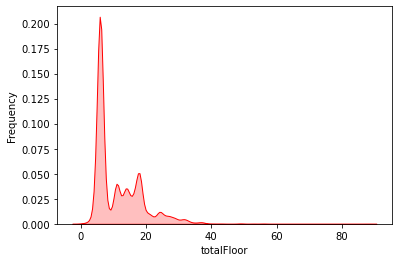

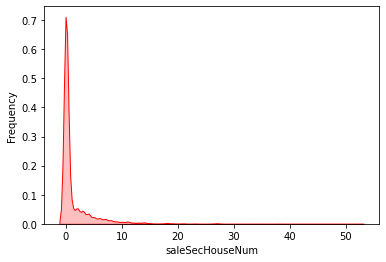

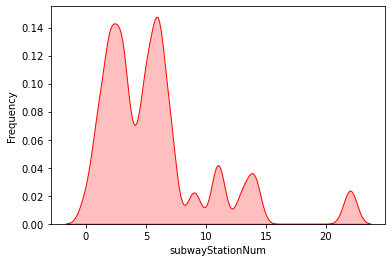

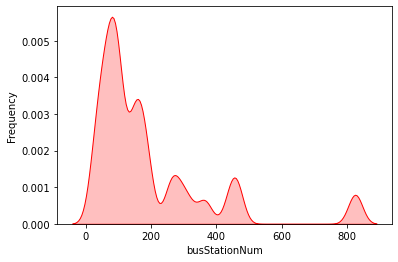

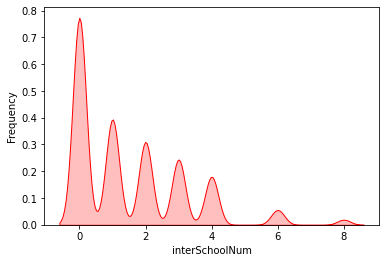

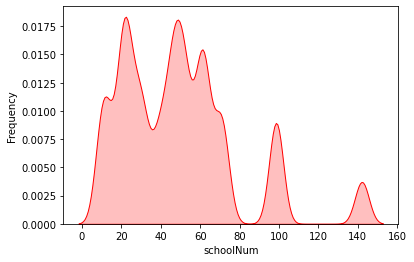

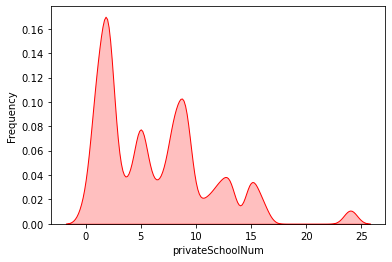

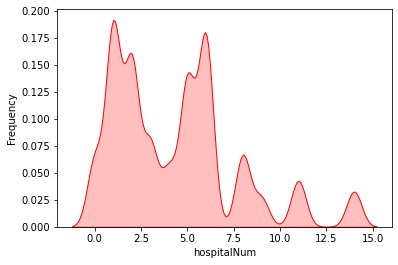

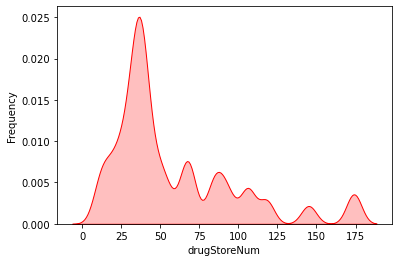

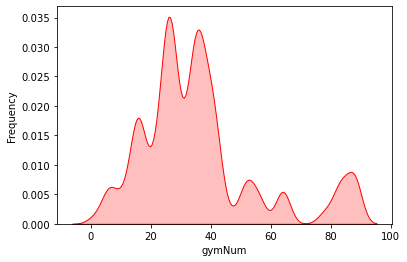

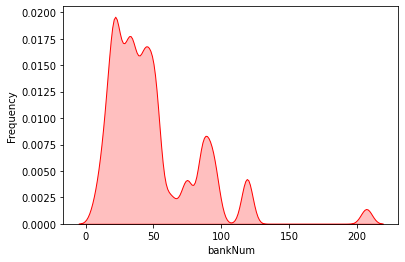

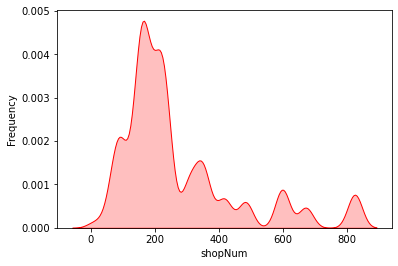

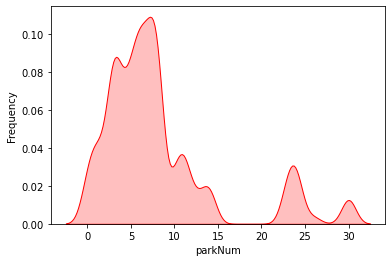

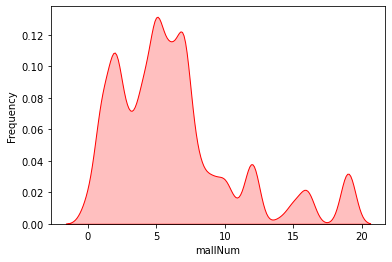

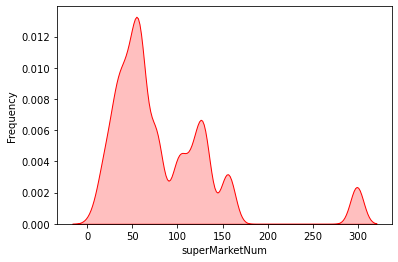

In [34]:
# those columns with Continuous values 
columns = ['area','totalFloor', 'saleSecHouseNum', 'subwayStationNum', 'busStationNum', 'interSchoolNum',
           'schoolNum', 'privateSchoolNum', 'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum','parkNum',
           'mallNum', 'superMarketNum','lookNum']
# look up the distribution of Continuous variable 
features = [i for i in columns if i not in ['area','tradeMoney', 'lookNum']]
for column in features:
    g = sns.kdeplot(df[column], color="Red", shade = True)
    g.set_xlabel(column)
    g.set_ylabel("Frequency")
    plt.show()

In [35]:
#according to the distributon ,clean the outliers as below:
df = df[(df['tradeMoney']<=35000)&(df['tradeMoney']>500)]
df = df[df['totalFloor']<=40]

In [36]:
'''Some of the columns contain String values which might not be compatible to certain machine 
learning algorithms that will be implemented in the subsequent sections. 
Therefore, we need to transform the data into labels encoded by numeric values (i.e., 0, 1, 2, ...).'''

# the type of 'houseDecoration' is orderial, so replaced the values with (0,1,2,3)
def process_houseDecoration_nodiv(df_process):
    for index, row in df_process.iterrows():
        decoration_str = row['houseDecoration']
        if decoration_str == 'Fine':
            decoration_num = 3
        elif decoration_str == 'Simple':
            decoration_num = 2
        elif decoration_str == 'Undecorated':
            decoration_num = 1
        else:
            decoration_num = 0
        df_process.loc[index, 'houseDecoration'] = decoration_num
    return df_process

# the type of 'houseFloor' is orderial, so replaced the values with (1,2,3)
def houseFloor2number(df_process):
    for index, row in df_process.iterrows():
        houseFloor_str = row['houseFloor']
        if houseFloor_str == 'Low':
            houseFloor_num = 1
        elif houseFloor_str == 'Mid':
            houseFloor_num = 2
        else:
            houseFloor_num = 3
        df_process.loc[index, 'houseFloor'] = houseFloor_num
    return df_process

df = process_houseDecoration_nodiv(df)
df = houseFloor2number(df)
            

In [37]:
#for those attributes describing the plate condition such as subwayStationNum', 'busStationNum, we will use pca to reduce the dimension.
df = df.reset_index()
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
# combine subwayStationNum', 'busStationNum as traffic
cols = ['subwayStationNum', 'busStationNum']
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['traffic'])
df = pd.concat([df,t_pd],axis=1)
# combine 'interSchoolNum','schoolNum', 'privateSchoolNum' as education
cols = ['interSchoolNum','schoolNum', 'privateSchoolNum' ]
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['education'])
df = pd.concat([df,t_pd],axis=1)
# combine  'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum'as daily life
cols = [ 'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum' ]
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['daily_life'])
df = pd.concat([df,t_pd],axis=1)
# drop these attributes and  other catagorical attribute which has too much dimensions.
df.drop(['plate','subwayStationNum', 'busStationNum', 'interSchoolNum','schoolNum', 'privateSchoolNum',
        'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum','shopNum','parkNum', 'mallNum', 'superMarketNum',
         'communityName','index','ID'],axis=1,inplace=True)

# drop some original features because some features can represent them ,for example ,tradeMeanPrice can represent both totalTradeMoney, totalTradeArea
df.drop(['totalTradeMoney', 'totalTradeArea', 'totalNewTradeMoney', 'totalNewTradeArea'],axis=1,inplace=True)

In [38]:
df.head()

,area,rentType,houseFloor,totalFloor,houseToward,houseDecoration,region,buildYear,saleSecHouseNum,tradeMeanPrice,...,residentPopulation,tradeTime,tradeMoney,bedroom,livingroom,bathroom,tradeMonth,traffic,education,daily_life
0,68.06,Unknown,1,16.0,SW,0,RG00001,1953,0.0,47974.22551,...,111546.0,2018/11/28,2000.0,2,1,1,11,-151.372723,-20.912302,-213.330569
1,125.55,Unknown,2,14.0,SW,2,RG00002,2007,0.0,40706.66775,...,157552.0,2018/12/16,2000.0,3,2,2,12,-3.407969,-22.981462,-122.097436
2,78.94,Unknown,2,18.0,SW,0,RG00002,2014,6.0,20106.77761,...,253337.0,2018/11/18,1000.0,2,2,1,11,176.594739,11.012939,97.763036
3,76.00,Unknown,2,5.0,SW,0,RG00006,1997,0.0,22759.44425,...,371900.0,2018/3/24,1800.0,2,1,1,3,273.612039,22.297058,327.232237
4,120.55,Unknown,2,6.0,SW,0,RG00006,2007,0.0,22759.44425,...,371900.0,2018/3/19,1450.0,3,2,1,3,273.612039,22.297058,327.232237


In [39]:
df.info

<bound method DataFrame.info of          area rentType houseFloor  totalFloor houseToward houseDecoration  \
0       68.06  Unknown          1        16.0          SW               0   
1      125.55  Unknown          2        14.0          SW               2   
2       78.94  Unknown          2        18.0          SW               0   
3       76.00  Unknown          2         5.0          SW               0   
4      120.55  Unknown          2         6.0          SW               0   
...       ...      ...        ...         ...         ...             ...   
38702   13.00    Whole          1         3.0           N               3   
38703   11.30   Shared          2        18.0           N               3   
38704   40.00  Unknown          1         6.0           N               0   
38705   51.97    Whole          2        16.0           N               3   
38706   13.50  Unknown          1         2.0           N               0   

        region  buildYear  saleSecHouseNum 

In [40]:
#feature reduction
# renttype and house toward are extremely unbalanced so we just drop these two attributes
# df.drop(['rentType','houseToward'],axis=1,inplace=True)
#Feature Importance for numeric value
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['area', 'houseFloor', 'totalFloor', 'houseDecoration', 'buildYear', 'saleSecHouseNum',
       'tradeMeanPrice', 'tradeSecNum', 'tradeNewMeanPrice',
       'tradeNewNum', 'remainNewNum', 'supplyNewNum', 'supplyLandNum',
       'supplyLandArea', 'tradeLandNum', 'tradeLandArea', 'landTotalPrice',
       'landMeanPrice', 'totalWorkers', 'newWorkers', 'residentPopulation',
       'bedroom', 'livingroom', 'bathroom']]#independent columns

X_col = X.columns
y = df[ 'tradeMoney']    #target column i.e price range

# before R test we need to normamlize these attributes.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X_col)

#use chi-squared (chi²) statistical test find the most important feature.
bestfeatures = SelectKBest(score_func=chi2, k=24)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(24,'Score').sort_values(ascending=False,by='Score'))


                 Specs         Score
3      houseDecoration  12578.932805
0                 area   2584.219367
21             bedroom   2086.138566
12       supplyLandNum    910.152807
18        totalWorkers    881.409999
2           totalFloor    693.237098
19          newWorkers    590.025135
13      supplyLandArea    532.808373
22          livingroom    513.625611
11        supplyNewNum    491.065066
9          tradeNewNum    471.891151
14        tradeLandNum    470.979205
16      landTotalPrice    466.940171
15       tradeLandArea    404.544629
8    tradeNewMeanPrice    392.694721
20  residentPopulation    385.254777
6       tradeMeanPrice    382.582858
10        remainNewNum    369.981941
17       landMeanPrice    332.699862
1           houseFloor    262.038893
7          tradeSecNum    213.630984
5      saleSecHouseNum    204.631342
23            bathroom    163.733075
4            buildYear     46.212741


In [41]:
#As the socre of each numerical attribute we delete last ten attributes
df.drop(['buildYear','bathroom','saleSecHouseNum','tradeSecNum','houseFloor','landMeanPrice','remainNewNum',
         'tradeMeanPrice','residentPopulation','tradeNewMeanPrice'],axis=1,inplace=True)

In [42]:
df.shape

(38707, 23)

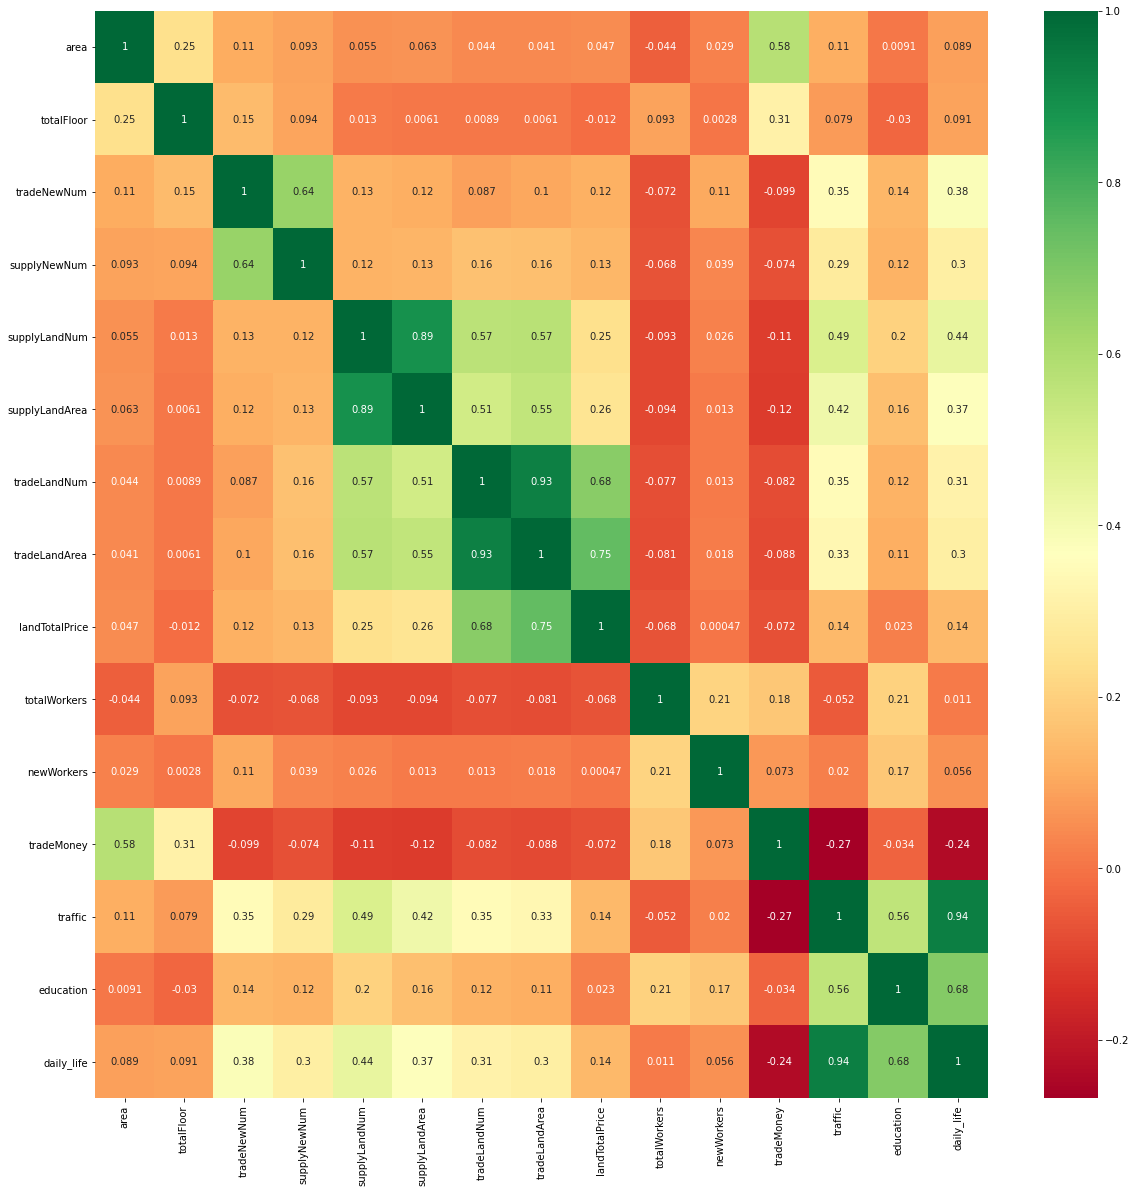

In [43]:
#Correlation Matrix with Heatmap
 #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [44]:
#delete some features get high correlation with the features which got higher score in R suqare test.
df.drop(['supplyLandArea','tradeLandArea'],axis=1,inplace=True)

# because daily life and traffic has a strong relationship, so use pca to combine them as convenience
cols = ['daily_life', 'traffic']
traffic = pca.fit_transform(df[cols])
t_pd = pd.DataFrame(data=traffic, columns=['convenience'])
df = pd.concat([df,t_pd],axis=1)
df.drop(['daily_life', 'traffic'],axis=1,inplace=True)

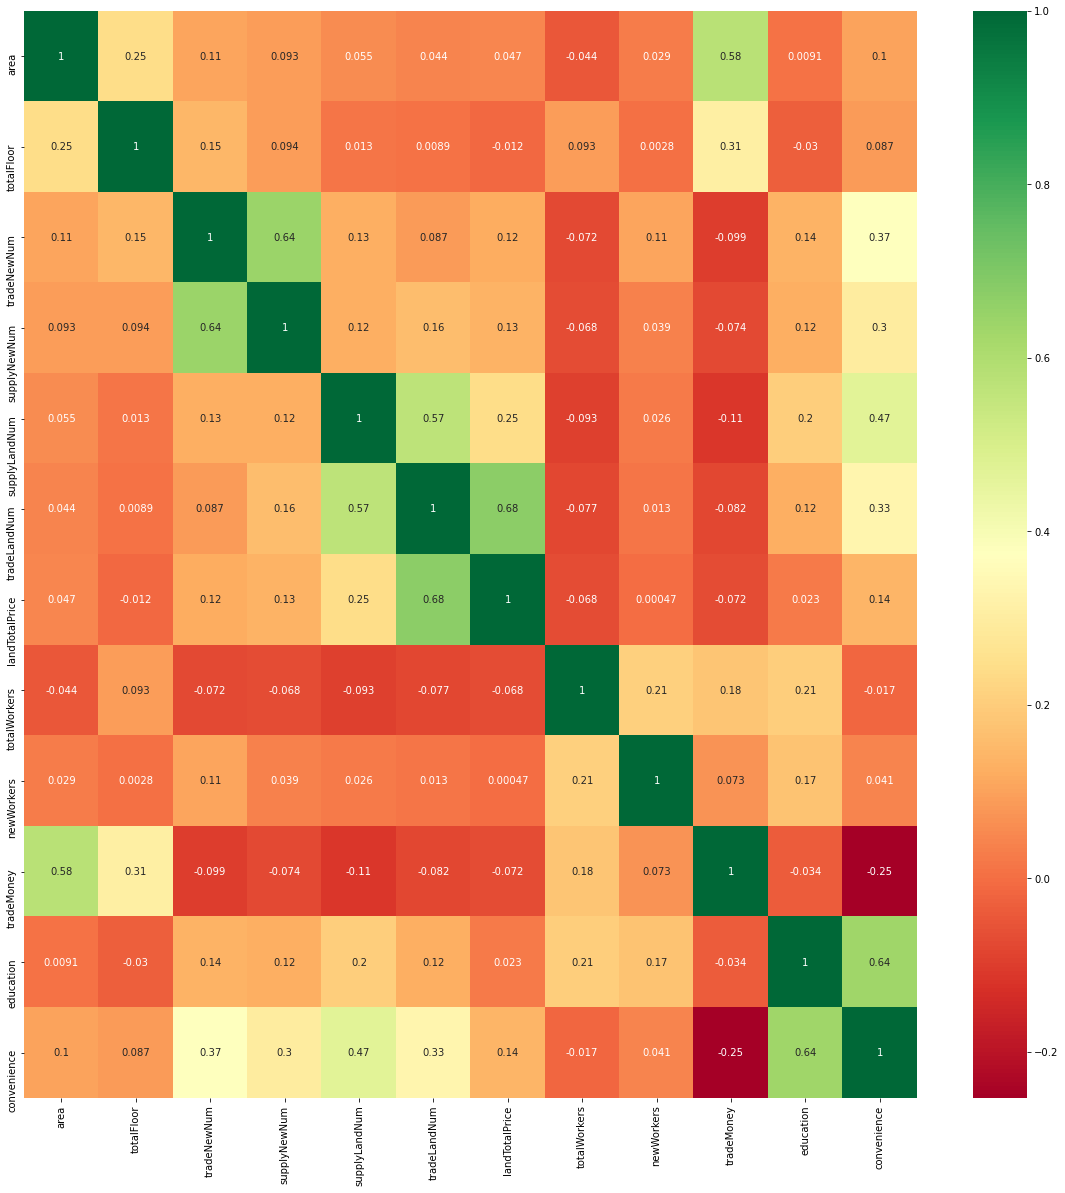

In [46]:
#Correlation Matrix with Heatmap
 #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [45]:
df.shape

(38707, 20)

## Data Modelling

In [219]:
#custom function for modelling and plotting
def Predictive_Model(estimator):
    estimator.fit(X_train, y_train)
    prediction = estimator.predict(X_test)
    print('R_squared:', metrics.r2_score(y_test, prediction))
    print('Square Root of MSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))
    plt.figure(figsize=(10,5))
    sns.distplot(y_test, hist=True, kde=False)
    sns.distplot(prediction, hist=True, kde=False)
    plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
    plt.title(str(estimator))
    plt.xlim(0,)


#### Linear Regression (OLS)

In [47]:
#training model - linear regression
from sklearn.model_selection import train_test_split
X = df[['area', 'rentType', 'totalFloor', 'houseToward', 'houseDecoration',
       'region', 'tradeNewNum', 'supplyNewNum', 'supplyLandNum',
       'tradeLandNum', 'landTotalPrice', 'totalWorkers', 'newWorkers',
       'bedroom', 'livingroom', 'education',
       'convenience']]
y = df[ 'tradeMoney']
#transform the categorical variable into Dummy Variables
for i in ['rentType', 'region','houseToward']:
    X_dum=pd.get_dummies(X[i],prefix=i)
    X.drop(i,axis=1,inplace=True)
    X = pd.concat([X,X_dum],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
from sklearn.linear_model import LinearRegression
reg_ls = LinearRegression()
reg_ls.fit(X_train, y_train)
print('R-squared:', reg_ls.score(X_train, y_train))
print('Estimated intercept coefficients: ', reg_ls.intercept_)
print('Number of coefficients: ', len(reg_ls.coef_))
print('Coefficients: ', reg_ls.coef_)


R-squared: 0.6013606469014849
Estimated intercept coefficients:  9.926894654683565
Number of coefficients:  41
Coefficients:  [ 4.86964159e+01  6.35060771e+01  1.10626392e+02  3.86514107e-01
 -6.66181306e-02  1.39778340e+02  8.30328005e+01 -4.59587213e-08
  2.73755068e-03  2.42612802e-03  1.02955878e+01  2.80790276e+02
  1.08865886e+01 -3.09232724e+00  7.44700256e+01 -6.39026122e+01
 -1.05674135e+01  6.08569239e+02 -1.23998000e+02 -3.57351322e+02
 -1.08839450e+03 -9.81260160e+01 -2.10216306e+03  3.60516863e+02
  1.05201121e+03  1.59887099e+03 -8.49673618e+02 -1.11705059e+03
  3.85829461e+02  2.48482335e+03  2.08178943e+02 -9.62042946e+02
  6.40752707e+01  1.72265950e+02  1.02268288e+02 -2.24912242e+01
 -3.46386052e+01  1.24549877e+02 -7.37166295e+01 -1.84765448e+02
 -1.47547478e+02]


In [48]:
#get coefficients of each feature
pd.DataFrame(np.array((X_train.columns, reg_ls.coef_)).T,columns=['features', 'estimatedCoefficients'])


,features,estimatedCoefficients
0,area,48.6964
1,totalFloor,63.5061
2,houseDecoration,110.626
3,tradeNewNum,0.386514
4,supplyNewNum,-0.0666181
5,supplyLandNum,139.778
6,tradeLandNum,83.0328
7,landTotalPrice,-4.59587e-08
8,totalWorkers,0.00273755
9,newWorkers,0.00242613


R_squared: 0.6111783533170183
Square Root of MSE: 1692.5913940088903


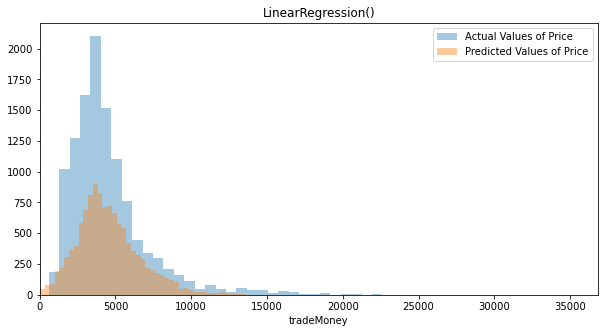

In [221]:
reg_ls = LinearRegression()
Predictive_Model(reg_ls)

In [49]:
# Collect the coefficients
df_ols_coef = pd.DataFrame(reg_ls.coef_, index=X_train.columns, columns=['Coefficients'])
df_ols_coef['Coef_abs'] = df_ols_coef.Coefficients.abs()

mean_absolute_error: 1131.5905687620993
mean_squared_error: 2864865.6270729587
r2_score 0.6111783533170183


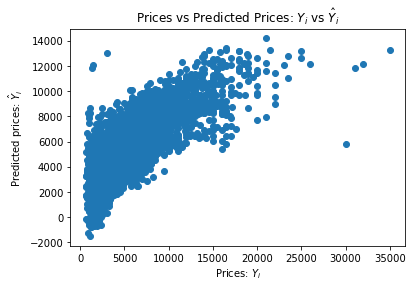

In [50]:
#get a pretty good R-square value , so we next use test data get error.
y_pred_ls = reg_ls.predict(X_test)
# plot prediction and actual data
plt.scatter(y_test, y_pred_ls)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('mean_absolute_error:',mean_absolute_error(y_test, y_pred_ls))
print('mean_squared_error:',mean_squared_error(y_test, y_pred_ls))
print('r2_score',r2_score(y_test, y_pred_ls))

#### Ridge Regression

In [51]:
# Ridge 5-fold Cross-Validation
from sklearn.linear_model import  Ridge, Lasso, RidgeCV, LassoCV
ridge_mod = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=5)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))



Best Ridge alpha: 2.782559402207126
Training score: 0.601356376439159
Test Score: 0.6111725951438762


In [215]:
# Ridge 10-fold Cross-Validation
from sklearn.linear_model import  Ridge, Lasso, RidgeCV, LassoCV
ridge_mod = RidgeCV(alphas=np.logspace(-4, 4, 10), cv=10)
ridge_mod.fit(X_train, y_train)

print('Best Ridge alpha:', ridge_mod.alpha_)
print('Training score:', ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))



Best Ridge alpha: 2.782559402207126
Training score: 0.601356376439159
Test Score: 0.6111725951438762


> Both 5-fold and 10-fold Cross-Validation returned equal best alpha for Ridge Regression

In [61]:
# Collect the coefficients
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()
# Confirmed similar to the above Ridge CV scores
from sklearn.model_selection import KFold, cross_val_score
ridge_mod = Ridge(alpha=21.54)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.58166034 0.60886901 0.60240884 0.5992041  0.6081915 ]
Mean cross-validated training score: 0.600066759696477
Training Score: 0.6012791689108425
Test Score: 0.6110942062532209


In [212]:
# Collect the coefficients
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()
# Confirmed similar to the above Ridge CV scores
from sklearn.model_selection import KFold, cross_val_score
ridge_mod = Ridge(alpha=21.54)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=10)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.565 0.598 0.608 0.61  0.591 0.614 0.578 0.619 0.605 0.612]
Mean cross-validated training score: 0.6000204649684873
Training Score: 0.6012791689108419
Test Score: 0.6110942062532203


#### Ridge Regression using best alpha estimated by cross-validation

In [52]:
# Collect the coefficients
df_ridge_coef = pd.DataFrame(ridge_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_ridge_coef['Coef_abs'] = df_ridge_coef.Coefficients.abs()
# Confirmed similar to the above Ridge CV scores
from sklearn.model_selection import KFold, cross_val_score
ridge_mod = Ridge(alpha= ridge_mod.alpha_)

scores = cross_val_score(ridge_mod, X_train, y_train, cv=5)
print("Cross-validated training scores:", scores)
print("Mean cross-validated training score:", scores.mean())

ridge_mod.fit(X_train, y_train)
print("Training Score:", ridge_mod.score(X_train, y_train))
print("Test Score:", ridge_mod.score(X_test, y_test))

Cross-validated training scores: [0.58170407 0.60900534 0.6024937  0.59929097 0.60805283]
Mean cross-validated training score: 0.6001093835429251
Training Score: 0.601356376439159
Test Score: 0.6111725951438762


> There's a slight improvement, but not signifficant

In [74]:
from sklearn import metrics, linear_model
ridge_predictions = ridge_mod.predict(X_test)
ridge_predictions = ridge_mod.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, ridge_predictions))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test, ridge_predictions))

Mean Squared Error: 2864908.0537033956
Root Mean Squared Error: 1692.6039270022375
mean_absolute_error: 1131.4888701679872


Text(0.5, 1.0, 'Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\\hat{Y}_i$')

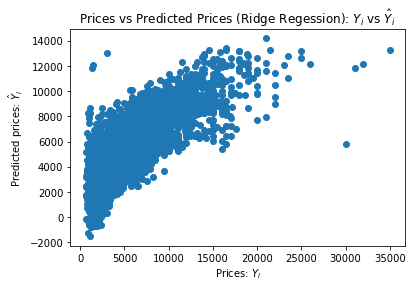

In [75]:
# plot prediction and actual data
plt.scatter(y_test, ridge_predictions)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\hat{Y}_i$')

R_squared: 0.6111725951438762
Square Root of MSE: 1692.6039270022375


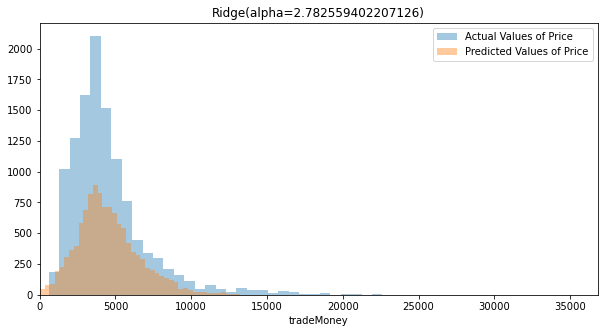

In [222]:
rr = Ridge(alpha=2.782559402207126)
Predictive_Model(rr)

R_squared: 0.6111725941167225
Square Root of MSE: 1692.6039292378878


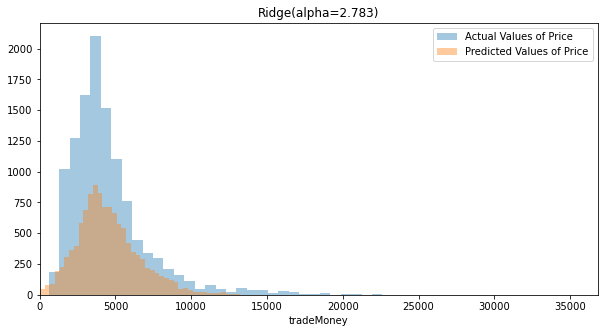

In [225]:
rr = Ridge(alpha=2.783)
Predictive_Model(rr)

#### Lasso Regression

In [76]:
# Lasso 5-fold Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=5)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.3593813663804626
Training score: 0.6013323205826391
Test Score: 0.6111082174537825


In [216]:
# Lasso 10-fold Cross-Validation
lasso_mod = LassoCV(alphas=np.logspace(-4, 4, 10), cv=10)
lasso_mod.fit(X_train, y_train)

print('Best Lasso alpha:', lasso_mod.alpha_)
print('Training score:', lasso_mod.score(X_train, y_train))
print("Test Score:", lasso_mod.score(X_test, y_test))

Best Lasso alpha: 0.3593813663804626
Training score: 0.6013323205826391
Test Score: 0.6111082174537825


> Both 5-fold and 10-fold Cross Validation returned the same best alpha for Lasso Regression, which is 0.3593813663804626

In [77]:
lasso_predictions = lasso_mod.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, lasso_predictions))**0.5)
print('mean_absolute_error:',mean_absolute_error(y_test, lasso_predictions))

Mean Squared Error: 2865382.393116011
Root Mean Squared Error: 1692.744042410432
mean_absolute_error: 1131.216751947928


Text(0.5, 1.0, 'Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\\hat{Y}_i$')

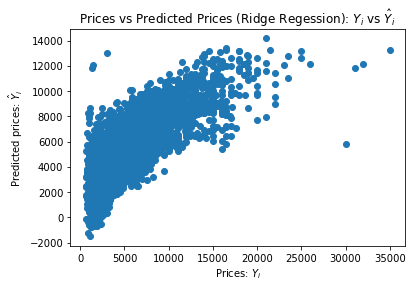

In [211]:
# plot prediction and actual data
plt.scatter(y_test, lasso_predictions)
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices (Ridge Regession): $Y_i$ vs $\hat{Y}_i$')

R_squared: 0.6111082174537825
Square Root of MSE: 1692.744042410432


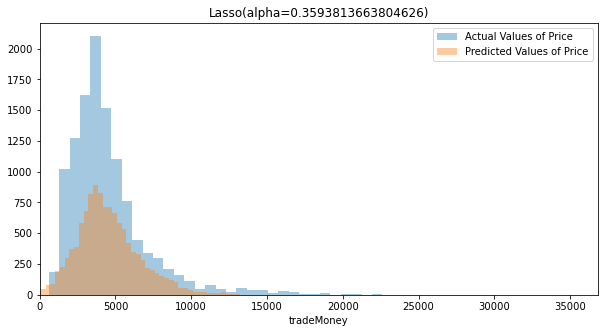

In [223]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3593813663804626)
Predictive_Model(lasso)

R_squared: 0.6111082487608078
Square Root of MSE: 1692.7439742747913


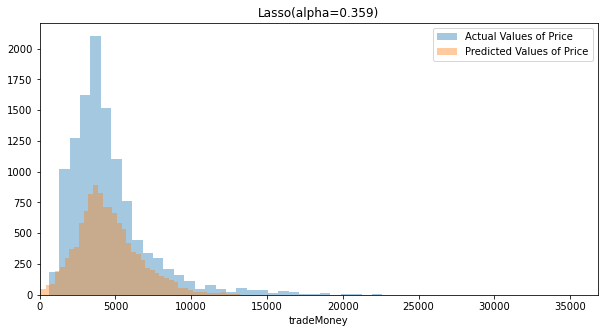

In [224]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.359)
Predictive_Model(lasso)

#### comparing coefficients predicted by Linear, Ridge, and Lasso Regression

In [78]:
# Collect the coefficients
df_lasso_coef = pd.DataFrame(lasso_mod.coef_, index=X_train.columns,
                       columns=['Coefficients'])
df_lasso_coef['Coef_abs'] = df_lasso_coef.Coefficients.abs()

In [79]:
#Comparing the coefficients from the three regression models
coef_0609 = pd.concat([df_ols_coef['Coefficients'], df_ridge_coef['Coefficients'], df_lasso_coef['Coefficients']])
coef_0609 = pd.DataFrame(coef_0609)
coef_0609.reset_index(level=0, inplace=True)
coef_0609.columns = ['variable', 'coefficient']

In [82]:
coef_0609.loc[0:40, "model"] = "regls"
coef_0609.loc[41:81, "model"] = "ridge"
coef_0609.loc[82:122, "model"] = "lasso"

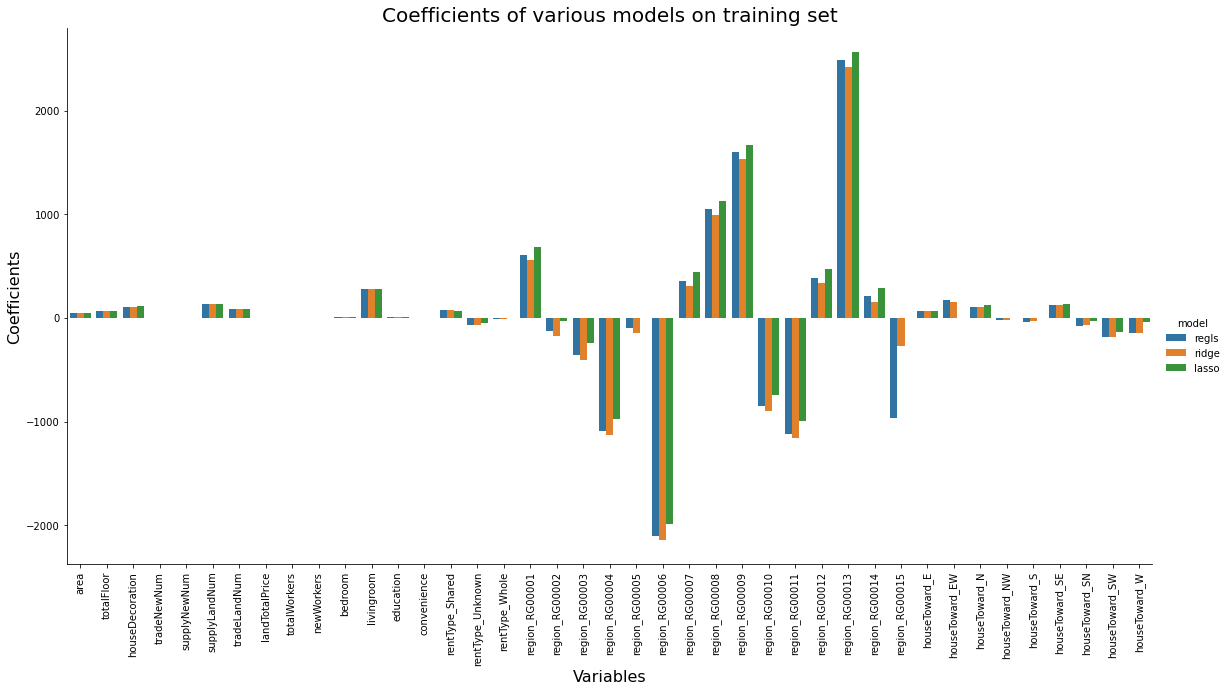

In [81]:
w = sns.catplot(x='variable', y='coefficient', hue='model', data=coef_0609, kind='bar', height=8, aspect=2)
# set rotation
w.set_xticklabels(rotation=90)

plt.title('Coefficients of various models on training set', fontsize=20)
plt.xlabel("Variables", size=16)
plt.ylabel("Coefficients", size=16)
plt.show()

#### KNN Regression

In [121]:
#model K Neighbors regression
from sklearn.neighbors import KNeighborsRegressor
k = 5
knr = KNeighborsRegressor(k)
knr.fit(X_train, y_train)
knr_predictions = knr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knr_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, knr_predictions))**0.5)
print('R-Squared:', (metrics.r2_score(y_test, knr_predictions))**0.5)

Mean Squared Error: 1548715.5133350557
Root Mean Squared Error: 1244.4739906221646
R-Squared: 0.8887109789256291


The optimal number of neighbors is 6
The minimal RMSE is 1242.55


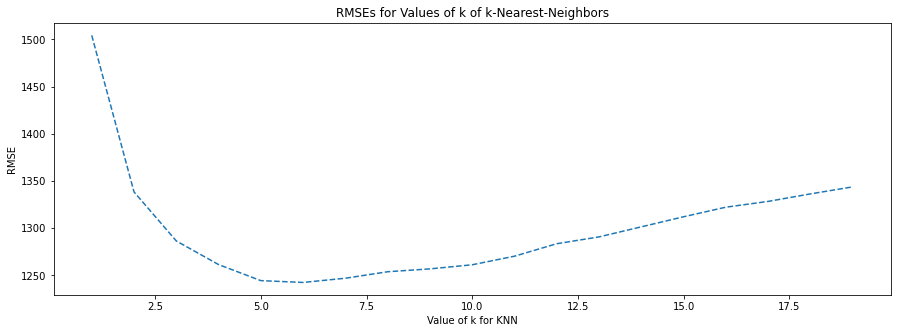

In [84]:
#use k = 5 the model perform better than regressiono model , now we will find a best K.
lrange=list(range(1,20))
RMSEs=[]
for i in lrange:
    k = i 
    knr = KNeighborsRegressor(k)
    knr.fit(X_train, y_train)
    knr_predictions = knr.predict(X_test)
    RMSE = (metrics.mean_squared_error(y_test, knr_predictions))**0.5
    RMSEs.append(RMSE)

optimal_k = lrange[RMSEs.index(min(RMSEs))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The minimal RMSE is %.2f" % min(RMSEs))
plt.figure(2,figsize=(15,5))
 
# plot the results
plt.plot(lrange, RMSEs,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('RMSE')
plt.title('RMSEs for Values of k of k-Nearest-Neighbors')
plt.show()

In [91]:
#using GridSearch to get best k for comparison
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knr = neighbors.KNeighborsRegressor()

model = GridSearchCV(knr, params, cv=5)
model.fit(X_train,y_train)
model.best_params_


{'n_neighbors': 5}

**using k=6**

In [171]:
#model K Neighbors regression using default distance metric (Euclidean)
from sklearn.neighbors import KNeighborsRegressor
k = 6
knr = KNeighborsRegressor(k)
knr.fit(X_train, y_train)
knr_predictions = knr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knr_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, knr_predictions))**0.5)
print('R-Squared:', (metrics.r2_score(y_test, knr_predictions))**0.5)

Mean Squared Error: 1543926.4769463341
Root Mean Squared Error: 1242.5483801230173
R-Squared: 0.8890765858827689


In [177]:
#model K Neighbors regression using Manhattan distance
from sklearn.neighbors import KNeighborsRegressor
k = 6
knr = KNeighborsRegressor(k, p=1, metric='minkowski')
knr.fit(X_train, y_train)
knr_predictions = knr.predict(X_test)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knr_predictions)) 
print('Root Mean Squared Error:', (metrics.mean_squared_error(y_test, knr_predictions))**0.5)
print('R-Squared:', (metrics.r2_score(y_test, knr_predictions))**0.5)

Mean Squared Error: 1525895.3948281137
Root Mean Squared Error: 1235.271385092407
R-Squared: 0.8904517769902296


R_squared: 0.7929043671450576
Square Root of MSE: 1235.271385092407


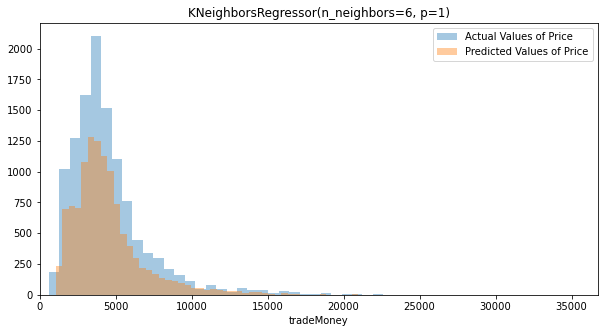

In [226]:
#using Manhattan distance and k=6
knn = KNeighborsRegressor(n_neighbors=6, p=1, metric='minkowski')
Predictive_Model(knn)

R_squared: 0.7904571755649605
Square Root of MSE: 1242.5483801230173


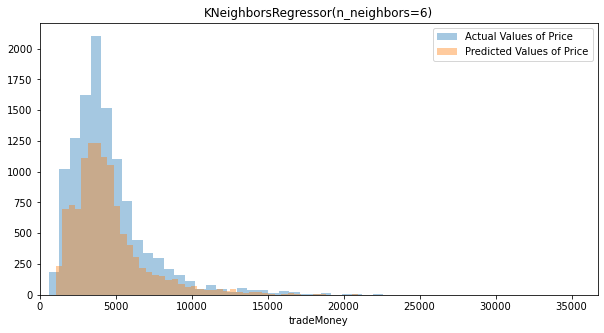

In [227]:
#using Euclidean distance and k=6
knn = KNeighborsRegressor(n_neighbors=6, p=2, metric='minkowski')
Predictive_Model(knn)

**Using k=5**

R_squared: 0.792635546597705
Square Root of MSE: 1236.072847285202


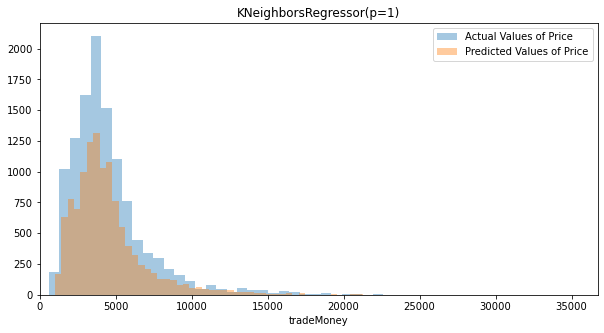

In [228]:
#using Manhattan distance and k=5
knn = KNeighborsRegressor(n_neighbors=5, p=1, metric='minkowski')
Predictive_Model(knn)

In [229]:
#Create a model using Euclidean distance
knr = KNeighborsRegressor(n_neighbors = 5, p = 2, metric='minkowski')

#Train the model
knr.fit(X_train, y_train)
#Let's predict the classes for test data
pred_test = knr.predict(X_test)
print(knr.score(X_test, y_test))

0.7898072040629499


### Decision Tree Regression 

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

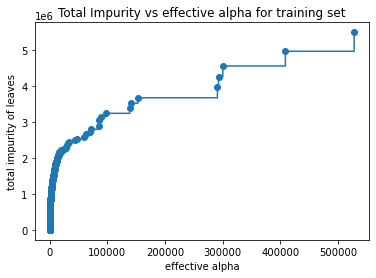

In [126]:
# model decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [135]:
dtm = DecisionTreeRegressor(max_depth=8,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train, y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,y_test)))

dtm.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(dtm.score(X_test,y_test)))

R-Squared on train dataset=0.5490143694794825
R-Squared on test dataset=0.5454422251711478


In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }


#use RandomizedSearch for Hyperparameter tuning
rand_cv_dtm = RandomizedSearchCV(dtm, param_grid, cv=5)

rand_cv_dtm.fit(X_train, y_train)
print("R-Squared::{}".format(rand_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(rand_cv_dtm.best_params_))

R-Squared::0.6967376735508082
Best Hyperparameters::
{'min_samples_split': 40, 'min_samples_leaf': 100, 'max_leaf_nodes': 100, 'max_depth': 8, 'criterion': 'mse'}


##### comparison of distributions using different max_depth

R_squared: 0.7747587668490757
Square Root of MSE: 1288.2520995981065


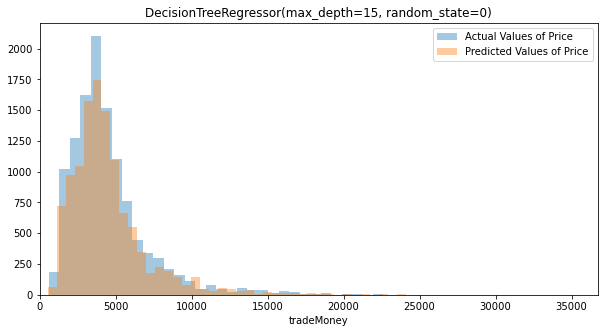

In [230]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, random_state=0)
Predictive_Model(dt)

R_squared: 0.781252254213576
Square Root of MSE: 1269.5467671741899


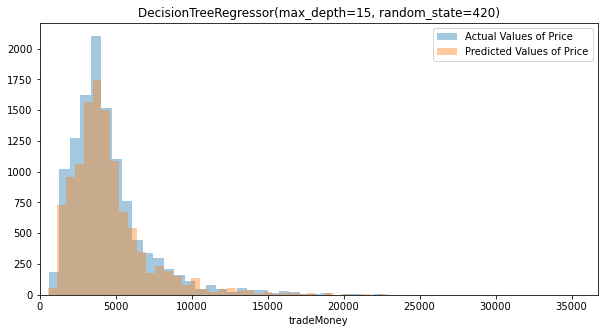

In [231]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, random_state=420)
Predictive_Model(dt)

R_squared: 0.7574013708923202
Square Root of MSE: 1336.9682133904269


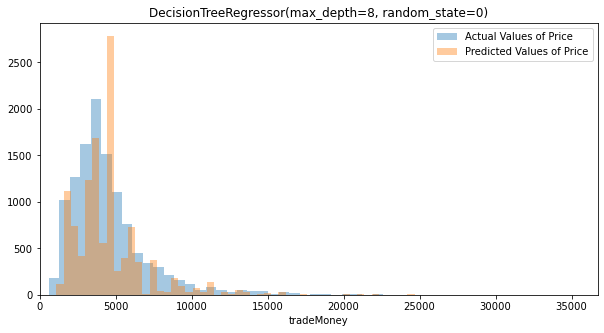

In [232]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, random_state=0)
Predictive_Model(dt)

R_squared: 0.7575104232635452
Square Root of MSE: 1336.667684193267


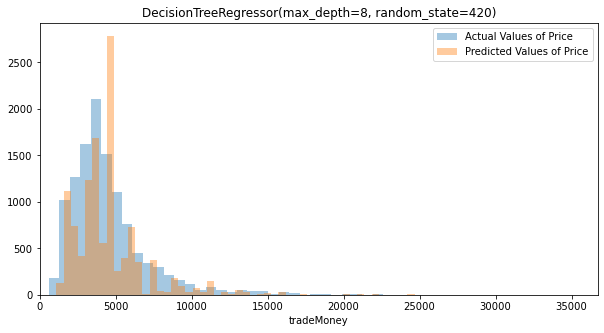

In [233]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, random_state=420)
Predictive_Model(dt)

R_squared: 0.7353998185286408
Square Root of MSE: 1396.2782712567493


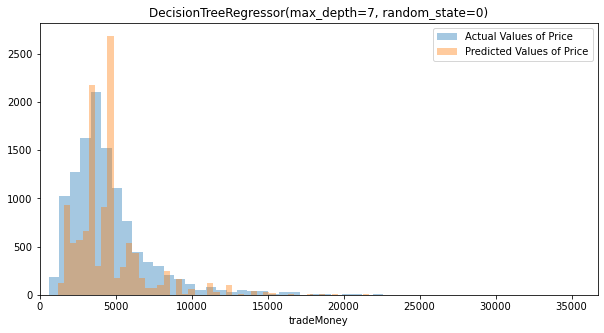

In [234]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7, random_state=0)
Predictive_Model(dt)

> In the decision tree model, the max depth is one of the factors to prevent the over-fitting issue of the model. As the depth of the tree is greater, the tree has more branches and becomes bigger. As the tree has more branches, the prediction for the training set can be more accurate. However, there is a bigger variance in predicting the testing set. Therefore, setting the max depth optimally is important in order to avoid the over-fitting issue. In the example above, max depth is set to 15. The R² of this model is 0.774, and the RMSE is 1288.252.

### Summarizing model performance after parameter tuning using cross validation

In [204]:
from sklearn.model_selection import cross_validate

lr_scores = cross_validate(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
rr_scores = cross_validate(Ridge(alpha=2.782559402207126), X_train, y_train, cv=10, scoring='r2')
ls_scores = cross_validate(Lasso(alpha=0.3593813663804626), X_train, y_train, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=6), X_train, y_train, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=8, random_state=0), X_train, y_train, cv=10, scoring='r2')

lr_test_score = lr_scores.get('test_score')
rr_test_score = rr_scores.get('test_score')
ls_test_score = ls_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')

box= pd.DataFrame({'Linear Regression':lr_test_score, 'Ridge Regression':rr_test_score, 'Lasso Regression':ls_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Linear Regression,Ridge Regression,Lasso Regression,K-Nearest Neighbors,Decision Tree
1,0.565245,0.565290,0.565509,0.744362,0.709408
2,0.598518,0.598507,0.598523,0.792564,0.740380
3,0.607731,0.607774,0.607713,0.781320,0.736023
4,0.609926,0.609882,0.609765,0.799765,0.734158
5,0.591969,0.591881,0.591686,0.729976,0.730206
6,0.613282,0.613393,0.613624,0.796835,0.729872
7,0.577756,0.577782,0.577875,0.787889,0.727247
8,0.619153,0.619146,0.619214,0.789736,0.743526
9,0.605282,0.605297,0.605358,0.786489,0.748623
10,0.611375,0.611453,0.611729,0.764147,0.722655


Text(0.5, 0, 'K-th Fold')

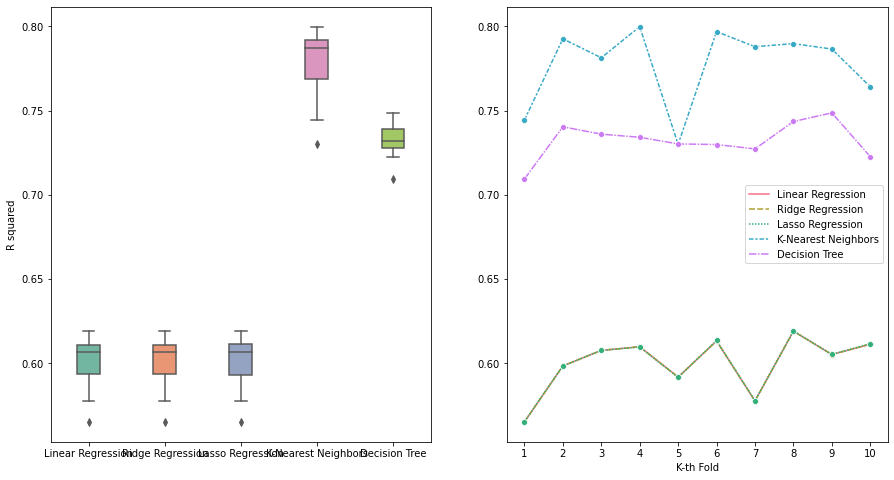

In [209]:
f,ax=plt.subplots(1,2, figsize=(15,8))
sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')
sns.lineplot(data=box.drop(box.tail(1).index), palette="husl", ax=ax[1],  marker='o')
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')

#### using max_depth=15 and random_state=420 for decision tree

In [235]:
from sklearn.model_selection import cross_validate

lr_scores = cross_validate(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
rr_scores = cross_validate(Ridge(alpha=2.782559402207126), X_train, y_train, cv=10, scoring='r2')
ls_scores = cross_validate(Lasso(alpha=0.3593813663804626), X_train, y_train, cv=10, scoring='r2')
knn_scores = cross_validate(KNeighborsRegressor(n_neighbors=6), X_train, y_train, cv=10, scoring='r2')
dt_scores = cross_validate(DecisionTreeRegressor(max_depth=15, random_state=420), X_train, y_train, cv=10, scoring='r2')

lr_test_score = lr_scores.get('test_score')
rr_test_score = rr_scores.get('test_score')
ls_test_score = ls_scores.get('test_score')
knn_test_score = knn_scores.get('test_score')
dt_test_score = dt_scores.get('test_score')

box= pd.DataFrame({'Linear Regression':lr_test_score, 'Ridge Regression':rr_test_score, 'Lasso Regression':ls_test_score, 'K-Nearest Neighbors':knn_test_score, 'Decision Tree':dt_test_score})
box.index = box.index + 1
box.loc['Mean'] = box.mean()
box

,Linear Regression,Ridge Regression,Lasso Regression,K-Nearest Neighbors,Decision Tree
1,0.565245,0.565290,0.565509,0.744362,0.757113
2,0.598518,0.598507,0.598523,0.792564,0.776568
3,0.607731,0.607774,0.607713,0.781320,0.715953
4,0.609926,0.609882,0.609765,0.799765,0.745240
5,0.591969,0.591881,0.591686,0.729976,0.760115
6,0.613282,0.613393,0.613624,0.796835,0.766572
7,0.577756,0.577782,0.577875,0.787889,0.728825
8,0.619153,0.619146,0.619214,0.789736,0.751306
9,0.605282,0.605297,0.605358,0.786489,0.730540
10,0.611375,0.611453,0.611729,0.764147,0.705654


In [250]:
box.to_csv('best model performance.csv')

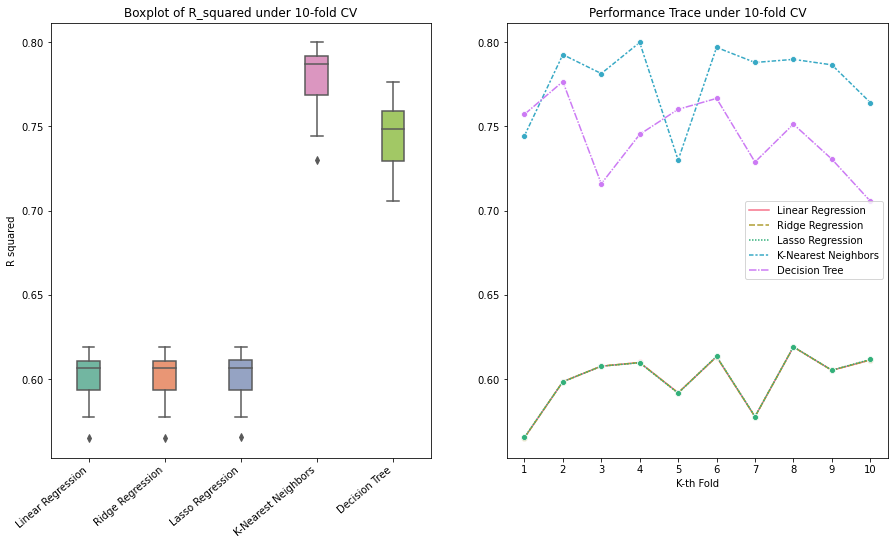

In [249]:
f,ax=plt.subplots(1,2, figsize=(15,8))
sns.boxplot(data=box.drop(box.tail(1).index), width=0.3, palette="Set2", ax=ax[0])
ax[0].set_ylabel('R squared')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].title.set_text('Boxplot of R_squared under 10-fold CV')
sns.lineplot(data=box.drop(box.tail(1).index), palette="husl", ax=ax[1],  marker='o')
ax[1].set_xticks(np.arange(1,11,1))
ax[1].set_xlabel('K-th Fold')
ax[1].title.set_text('Performance Trace under 10-fold CV')